In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [ ]:
original_df = pd.read_csv("C:/Dataset/coursework/movie_metadata.csv")

# 1. Data Exploration

In [ ]:
pd.set_option('display.max_columns',None)
original_df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
original_df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4935.000000,5020.000000,5035.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,687.058967,645.009761,6561.292552,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2814.402420,1665.041728,15021.990913,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.500000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,195.000000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4935 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5035 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

All the columns are correctly typed,numerical values with int or float and string with object

### Check for target class imbalance

In [ ]:
def encode_imdb_scores(d):
    if d <= 2:
        return 0
    elif d <= 4:
        return 1
    elif d <= 6:
        return 2
    elif d <= 8:
        return 3
    else:
        return 4

In [ ]:
target_df = pd.DataFrame()
target_df['imdb_score'] = original_df['imdb_score'].apply(encode_imdb_scores)

In [ ]:
target_df['imdb_score'].value_counts()

imdb_score
3    3205
2    1411
4     253
1     167
0       7
Name: count, dtype: int64

Text(0.5, 1.0, 'imdb_score_count')

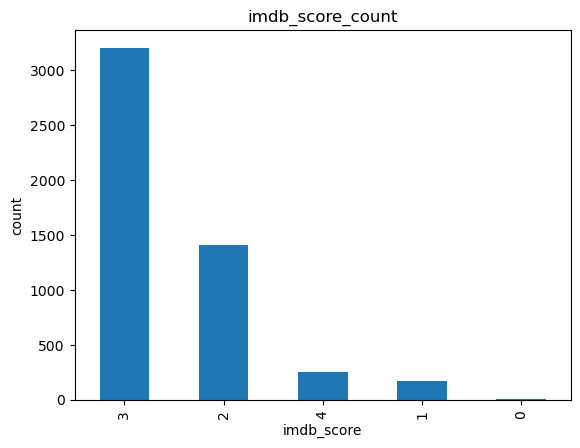

In [ ]:
target_df['imdb_score'].value_counts().plot.bar()
plt.ylabel("count")
plt.title("imdb_score_count")

In [ ]:
# Count occurrences of imdb_score values 4 and 1
count_4 = (target_df['imdb_score'] == 4).sum()
count_1 = (target_df['imdb_score'] == 1).sum()

# Calculate the ratio
ratio_4_to_1 = count_4 / count_1

print(f"The ratio between imdb_score 4 and 1 is: {ratio_4_to_1:.2f}")

The ratio between imdb_score 4 and 1 is: 1.51


Target class is imbalance, ratio between imdb_score of 4 (Good) and 1 (Poor) is 457.86

Because the target is imbalance, we need to be careful not to remove any of the rows with lower count like 1 2 and 5

When calculating the performance of the model, Accuracy might not be the suitable performance metric since it calculate the percentage of correctly predicted values to the overall values. Accuracy might be misleading because it is bias towards the the dominant value, and the minor value has little to no impact on the Accuracy.

When splitting the data, we should not use the normal splitting method, because minor values might end up only in one of the split.

# 2. Data cleaning

In [ ]:
df = original_df.copy()

### 2.1 Check and Remove duplicates

In [ ]:
df[df.duplicated()].sort_values(by='imdb_score').loc[(df['imdb_score'] > 4) & (df['imdb_score'] < 8)]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,Tim Blake Nelson,Fantastic Four,110486,1261,Tim Heidecker,3.0,box office flop|critically bashed|portal|telep...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000
3915,Color,Wes Craven,160.0,107.0,0.0,255.0,Emily Meade,798.0,14637490.0,Horror|Mystery|Thriller,Frank Grillo,My Soul to Take,16411,2537,Zena Grey,2.0,evil|killer|murder|psychopath|serial killer,136.0,English,USA,R,25000000.0,2010.0,374.0,4.8,2.35,0
4182,Color,Rob Zombie,220.0,119.0,0.0,593.0,Tyler Mane,908.0,33386128.0,Horror,Scout Taylor-Compton,Halloween II,36372,3226,Margot Kidder,0.0,halloween|hospital|michael myers|rampage|vomiting,491.0,English,USA,R,15000000.0,2009.0,764.0,4.9,1.85,3000
4313,Color,Bruce McCulloch,52.0,85.0,54.0,455.0,Megan Mullally,985.0,13973532.0,Comedy|Crime,Martin Starr,Stealing Harvard,11211,3065,Chris Penn,1.0,black humor|crying during sex|harvard|humor|ma...,92.0,English,USA,PG-13,25000000.0,2002.0,637.0,5.1,1.85,215
2798,Color,Shawn Levy,69.0,88.0,189.0,799.0,Donald Faison,934.0,47811275.0,Adventure|Comedy|Family,Frankie Muniz,Big Fat Liar,29008,3707,Lee Majors,1.0,brunette|film producer|liar|prank|stunt,99.0,English,USA,PG,15000000.0,2002.0,927.0,5.4,1.85,896
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,Robert Pattinson,The Twilight Saga: Breaking Dawn - Part 2,185394,59177,Taylor Lautner,3.0,battle|friend|super strength|vampire|vision,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
4408,Color,Yimou Zhang,101.0,95.0,611.0,3.0,Ni Yan,9.0,190666.0,Comedy|Drama,Honglei Sun,"A Woman, a Gun and a Noodle Shop",2410,18,Dahong Ni,1.0,betrayal|husband wife relationship|murder|nood...,20.0,Mandarin,China,R,NaN,2009.0,4.0,5.7,2.35,784
4927,Color,Jason Stone,48.0,108.0,14.0,826.0,Ellen Burstyn,2000.0,NaN,Thriller,Topher Grace,The Calling,6025,4385,Christopher Heyerdahl,2.0,bouquet|house fire|praying|serial killer|tied ...,28.0,English,USA,R,NaN,2014.0,1000.0,5.8,NaN,0
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,Hugh Jackman,Pan,39956,21393,Nonso Anozie,4.0,1940s|child hero|fantasy world|orphan|referenc...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
2771,Color,Ole Bornedal,264.0,92.0,30.0,309.0,Madison Davenport,941.0,49122319.0,Horror|Thriller,Kyra Sedgwick,The Possession,47169,2348,Natasha Calis,0.0,basketball coach|box|jewish|rabbi|yard sale,162.0,English,USA,PG-13,14000000.0,2012.0,459.0,5.9,2.35,17000


In [ ]:
df = df.drop_duplicates()

### 2.2 Check for miss input

In [ ]:
df["movie_title"].unique()

array(['Avatar\xa0', "Pirates of the Caribbean: At World's End\xa0",
       'Spectre\xa0', ..., 'A Plague So Pleasant\xa0',
       'Shanghai Calling\xa0', 'My Date with Drew\xa0'], dtype=object)

There is \xa0 string at the end of movie title to remove

### 2.3 Handling Missing Values

### Removing unrelated columns
Since movie_imdb_link is just the link to individual web page, it does not give any information about the movie. It is safe to drop the col

In [ ]:
original_df['movie_imdb_link'].nunique()

4919

Movie_imdb_link is feature with high cardinality, with large number of unique value, model might trying to memorize the data instead of learning the pattern which might cause overfitting

In [ ]:
original_df.drop(['movie_imdb_link'],axis=1,inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

gross                        874
budget                       487
aspect_ratio                 327
content_rating               301
plot_keywords                152
director_facebook_likes      107
title_year                   107
director_name                103
num_critic_for_reviews        49
actor_3_facebook_likes        23
actor_3_name                  23
num_user_for_reviews          21
color                         19
duration                      15
language                      14
actor_2_facebook_likes        13
facenumber_in_poster          13
actor_2_name                  13
actor_1_facebook_likes         8
actor_1_name                   7
country                        5
imdb_score                     0
cast_total_facebook_likes      0
num_voted_users                0
movie_title                    0
genres                         0
movie_facebook_likes           0
dtype: int64

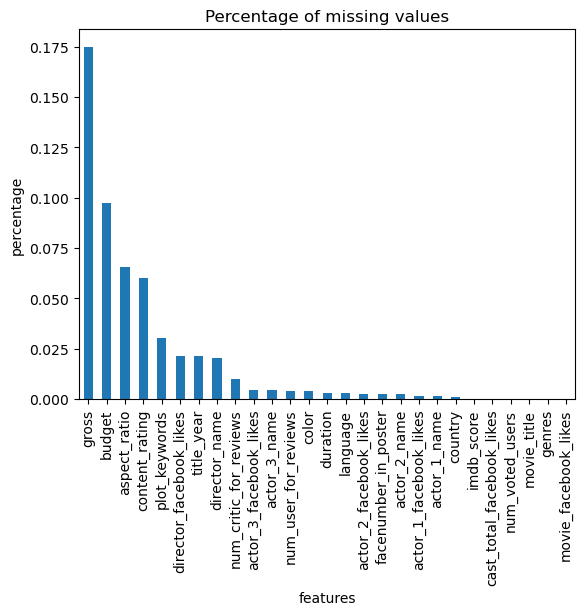

In [ ]:
# Check the percentage of missing value in each columns
df.isnull().mean().sort_values(ascending=False).plot.bar()
plt.title('Percentage of missing values')
plt.xlabel('features')
plt.ylabel('percentage')
plt.show()

Here we can see **gross** has the highest missing value percentage of **17%**
**Budget** has 10% missing value, **aspect ratio** has **7%** , content rating has **6%**
The rest are less than 3%
Most of the data are non missing data, but gross and budget has way too much missing value, **> 10%**, filling all of them with imputation might introduce bias

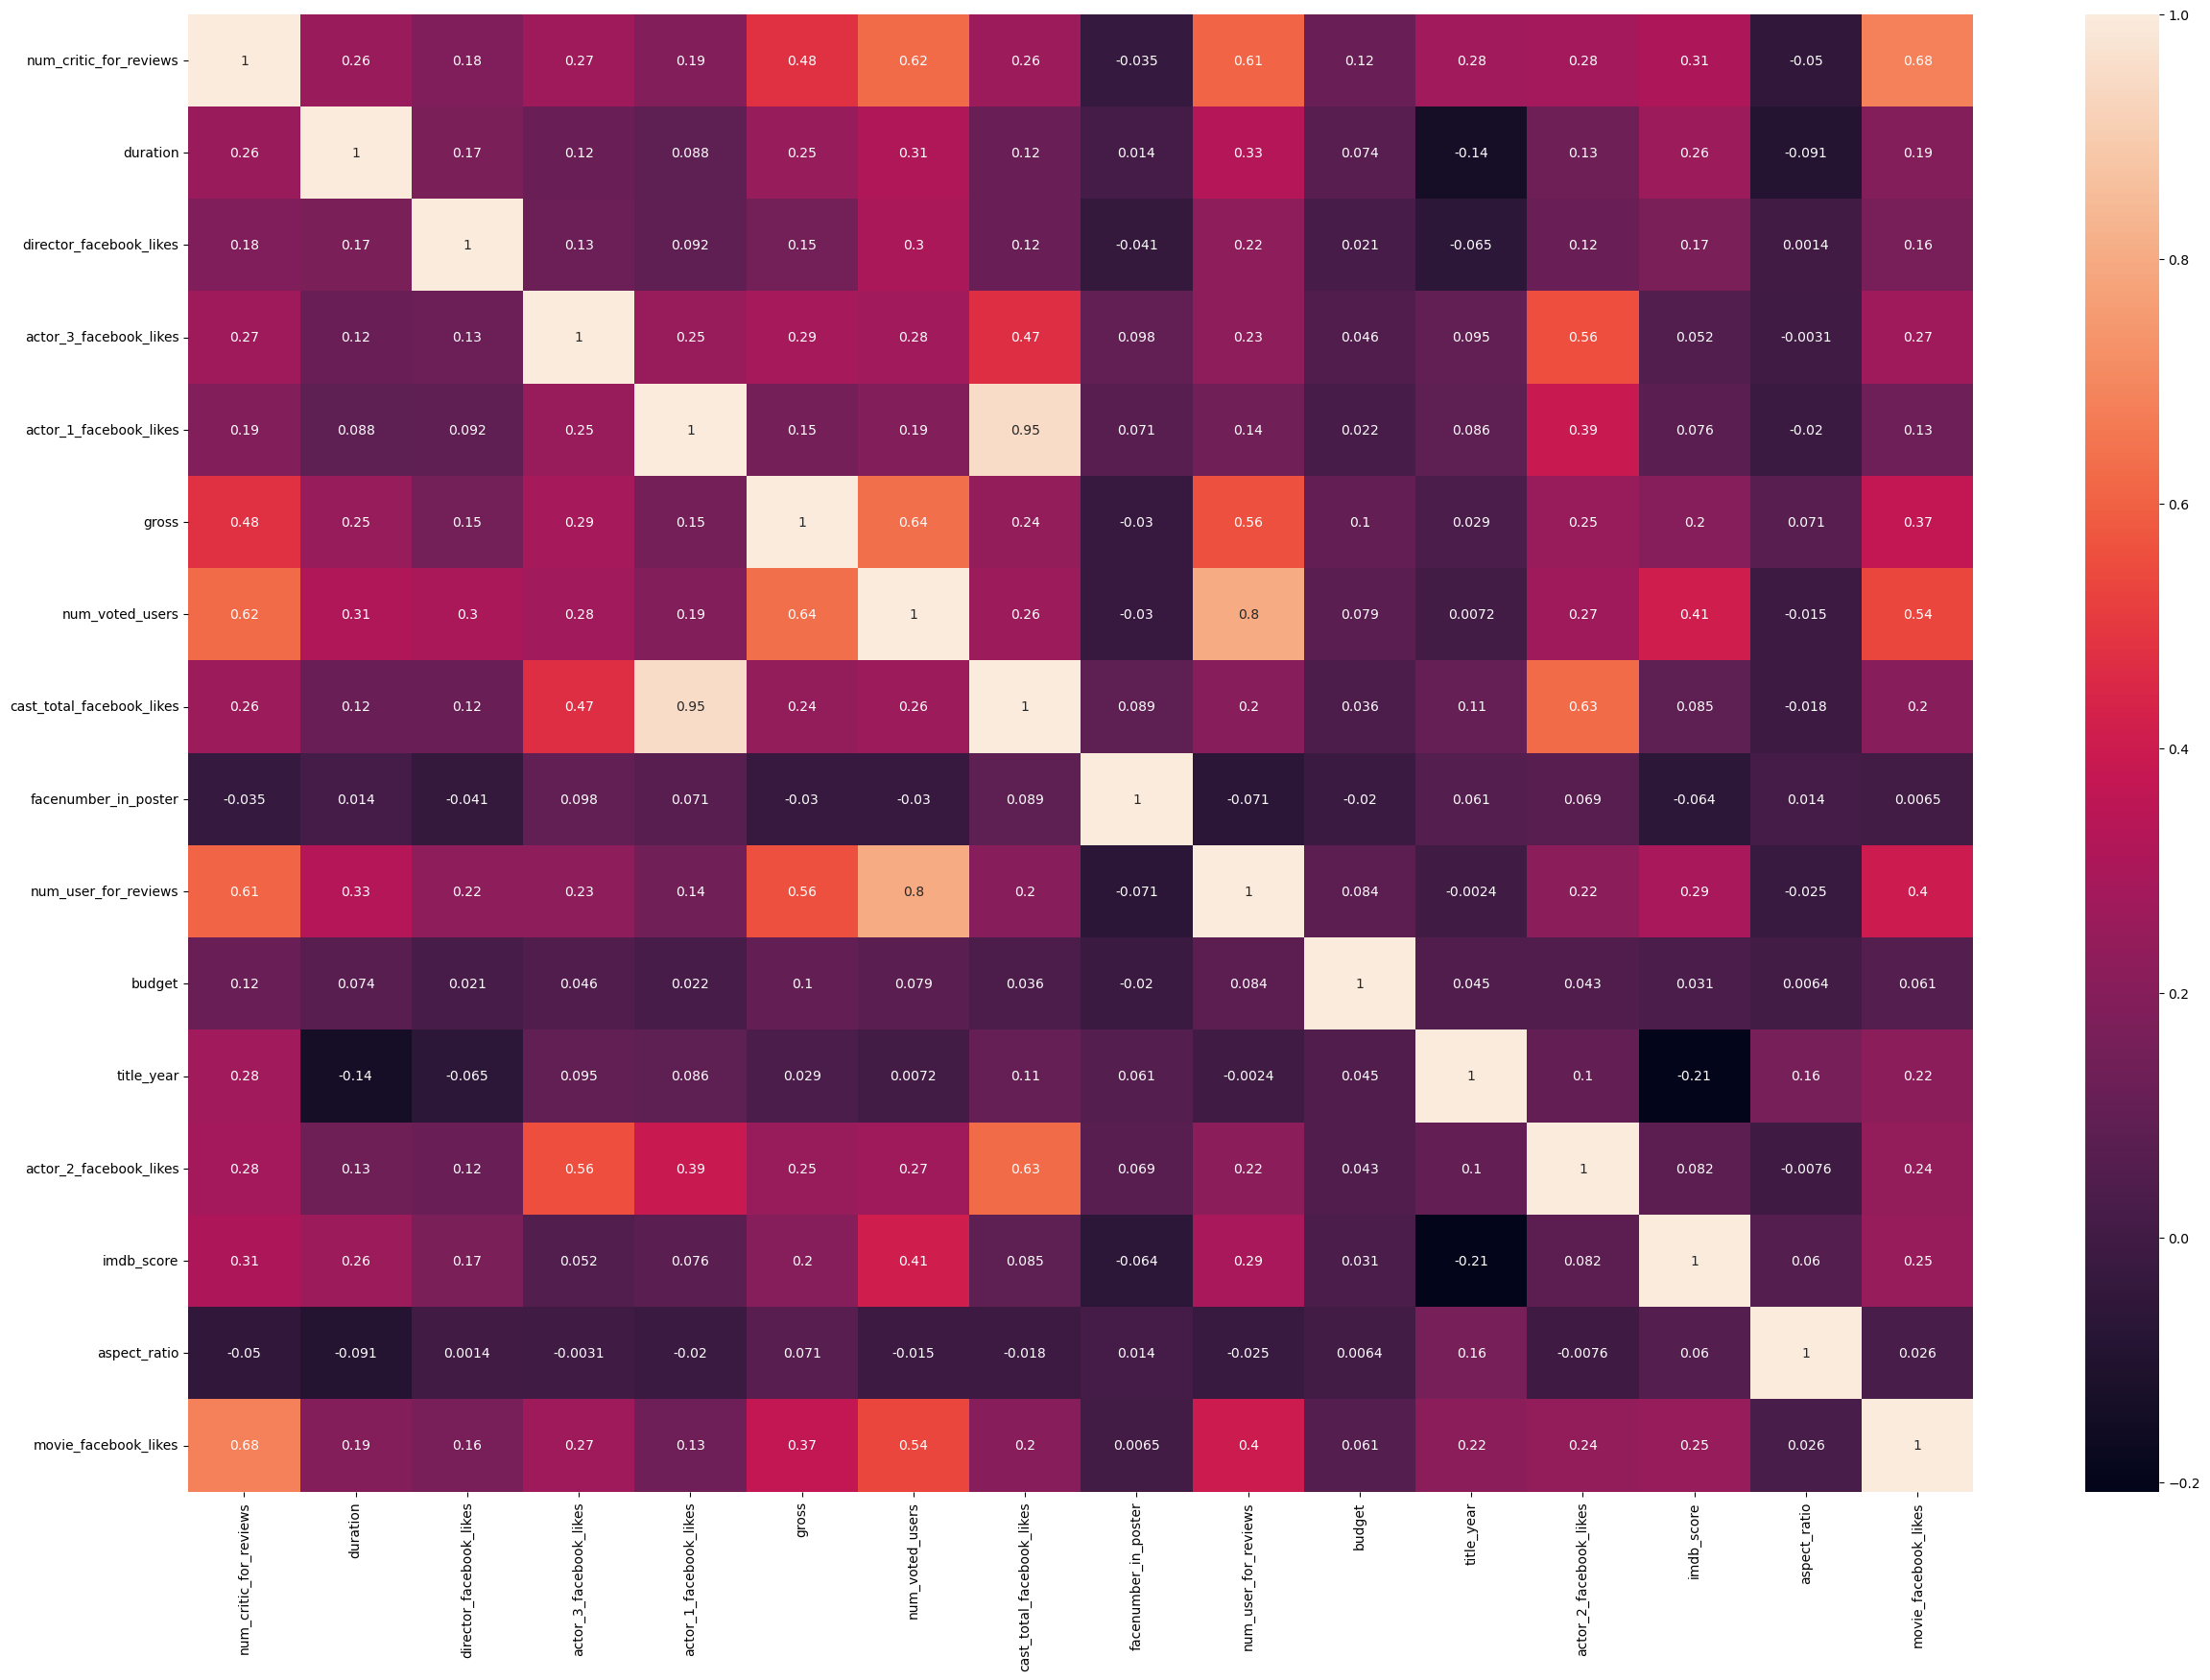

In [ ]:
numeric = df.corr(numeric_only=True)
plt.figure(figsize=(30, 20))
sns.heatmap(numeric, annot=True)
plt.show()

In [ ]:
df['gross'].corr(df['imdb_score'])

0.19841680855137456

In [ ]:
'''from sklearn.linear_model import LinearRegression

known_gross = df[df['gross'].notnull()]
unknown_gross = df[df['gross'].isnull()]

# Features and target variables
X = known_gross[['imdb_score']]
y = known_gross['gross']

# Creating a linear regression model
model = LinearRegression()
model.fit(X, y)

# Imputing missing 'gross' values based on 'imdb_score'
predicted_gross = model.predict(unknown_gross[['imdb_score']])

# Filling in the missing values in the DataFrame
df.loc[df['gross'].isnull(), 'gross'] = predicted_gross'''

"from sklearn.linear_model import LinearRegression\n\nknown_gross = df[df['gross'].notnull()]\nunknown_gross = df[df['gross'].isnull()]\n\n# Features and target variables\nX = known_gross[['imdb_score']]\ny = known_gross['gross']\n\n# Creating a linear regression model\nmodel = LinearRegression()\nmodel.fit(X, y)\n\n# Imputing missing 'gross' values based on 'imdb_score'\npredicted_gross = model.predict(unknown_gross[['imdb_score']])\n\n# Filling in the missing values in the DataFrame\ndf.loc[df['gross'].isnull(), 'gross'] = predicted_gross"

In [ ]:
'''known_budget = df[df['budget'].notnull()]
unknown_budget = df[df['budget'].isnull()]

# Features and target variables
X = known_budget[['imdb_score']]
y = known_budget['budget']

# Creating a linear regression model
model = LinearRegression()
model.fit(X, y)

# Imputing missing 'gross' values based on 'imdb_score'
predicted_budget = model.predict(unknown_budget[['imdb_score']])

# Filling in the missing values in the DataFrame
df.loc[df['budget'].isnull(), 'budget'] = predicted_budget'''

"known_budget = df[df['budget'].notnull()]\nunknown_budget = df[df['budget'].isnull()]\n\n# Features and target variables\nX = known_budget[['imdb_score']]\ny = known_budget['budget']\n\n# Creating a linear regression model\nmodel = LinearRegression()\nmodel.fit(X, y)\n\n# Imputing missing 'gross' values based on 'imdb_score'\npredicted_budget = model.predict(unknown_budget[['imdb_score']])\n\n# Filling in the missing values in the DataFrame\ndf.loc[df['budget'].isnull(), 'budget'] = predicted_budget"

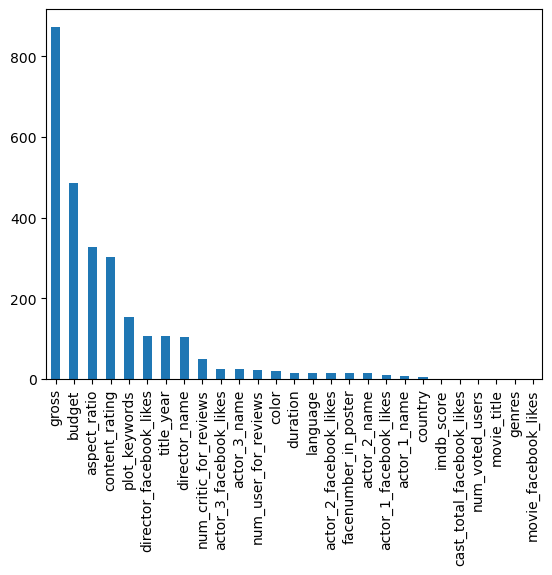

In [ ]:
df.isnull().sum().sort_values(ascending=False).plot.bar()
plt.show()

### 2.3.3 Aspect ratio

Text(0.5, 1.0, 'Aspect ratio count')

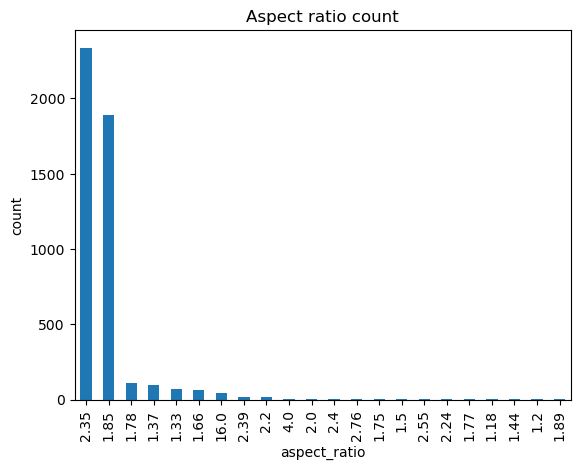

In [ ]:
df['aspect_ratio'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Aspect ratio count')

Most of the aspect ratio are **2.35** and **1.85**
we can group all the other aspect_ratio into 1.78 and evaluate the impact of aspect ratio on imdb_score

In [ ]:
df.loc[(df['aspect_ratio'] != 2.35) & (df['aspect_ratio'] != 1.85) , 'aspect_ratio'] = 1.78
df.groupby('aspect_ratio')['imdb_score'].mean().sort_values()

aspect_ratio
1.85    6.370741
2.35    6.478177
1.78    6.500908
Name: imdb_score, dtype: float64

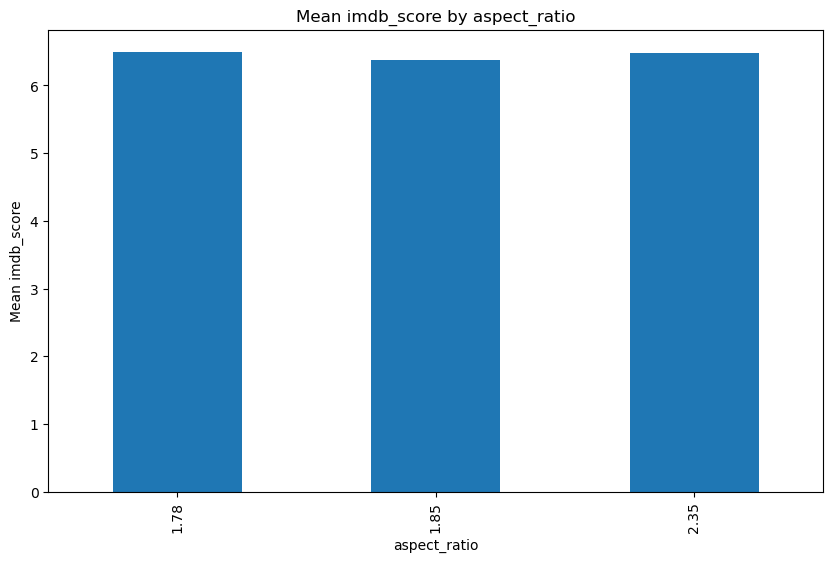

In [ ]:
aspect_ratio_mean_imdb_score = df.groupby('aspect_ratio')['imdb_score'].mean()
aspect_ratio_mean_imdb_score.plot(kind='bar', figsize=(10, 6))
plt.xlabel('aspect_ratio')
plt.ylabel('Mean imdb_score')
plt.title('Mean imdb_score by aspect_ratio')
plt.show()

Here we can see that aspect ratio is almost equally distributed,  means that different aspect ratio has the same mean imdb score,which might suggest that aspect ratio has little to no impact on imdb score.

No matter which aspect ratio we choose, it is going to give the same average imdb_score

In [ ]:
df['aspect_ratio'].corr(df['imdb_score'])

0.027419386781942515

aspect ratio has very weak or no correlation to imdb_score **< 0.3**

From the two analysis above,it is reasonable to drop a column with weak correlation and constant data.

ref:https://www.westga.edu/academics/research/vrc/assets/docs/scatterplots_and_correlation_notes.pdf

In [ ]:
df.drop('aspect_ratio',axis = 1,inplace = True)

### 2.3.4 Content Rating

Text(0, 0.5, 'count')

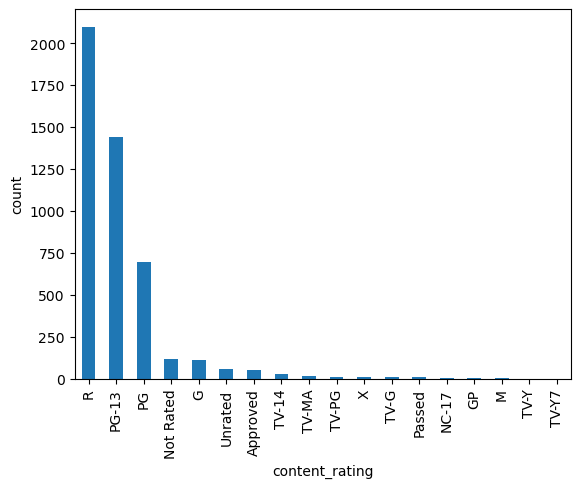

In [ ]:
df['content_rating'].value_counts().plot.bar()
plt.ylabel('count')


In [ ]:
# Replace missing values in 'content_rating' with an empty string ('')
df['content_rating'] = df['content_rating'].fillna('')

# Filter rows where 'content_rating' column starts with 'TV'
tv_content_rows = df[df['content_rating'].str.startswith('TV')]

print(tv_content_rows)

                 color  director_name  num_critic_for_reviews  duration  \
177              Color            NaN                    21.0      60.0   
260              Color            NaN                    29.0      60.0   
404              Color            NaN                   103.0      44.0   
459                NaN            NaN                    95.0      54.0   
479    Black and White            NaN                    31.0      25.0   
...                ...            ...                     ...       ...   
4803             Color            NaN                    11.0      22.0   
4819             Color            NaN                    23.0      43.0   
4869             Color            NaN                    11.0      58.0   
4937             Color  Bill Melendez                    43.0      25.0   
5039             Color            NaN                    43.0      43.0   

      director_facebook_likes  actor_3_facebook_likes           actor_2_name  \
177                

- X | NC -17
- R | TV-MA
- PG | TV-14
- PG | M | TV-PG | GP
- G | TV-Y | TV-G | TV-Y7
- Not rated | Unrated | approved | passed

**Not rated / Unrated, approved / passed are missing value convert them to mode**

In [ ]:
df[~df['content_rating'].str.startswith('TV')]
df['content_rating'].value_counts()

content_rating
R            2098
PG-13        1444
PG            698
              301
Not Rated     116
G             112
Unrated        60
Approved       55
TV-14          30
TV-MA          19
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: count, dtype: int64

In [ ]:
df['content_rating'] = df['content_rating'].str.replace('Not Rated','Unrated')
df['content_rating'] = df['content_rating'].str.replace('Approved', 'R')
df['content_rating'] = df['content_rating'].str.replace('Passed', 'R')

- Categorize content rating that are similar, X is just older version of NC-17
- NC-17 is roughly equal to R
- M and PG refers to same age group in movie
- G and GP are both all age but GP suggest parental guidance

In [ ]:
df['content_rating'] = df['content_rating'].str.replace('X','NC-17')
df['content_rating'] = df['content_rating'].str.replace('NC-17', 'R')
to_PG = ['M','GP']

for x in to_PG:
    df['content_rating'] = df['content_rating'].str.replace(x,'PG')

In [ ]:
df = df[~df['content_rating'].str.contains('TV')]

In [ ]:
df['content_rating'].value_counts()

content_rating
R          2182
PG-13      1444
PG          709
            301
Unrated     176
G           112
Name: count, dtype: int64

Since there is only 301 missing values in content rating, we can imputate using mode

In [ ]:
df['content_rating'] = df['content_rating'].replace('', 'Unrated')
df['content_rating'].value_counts()

content_rating
R          2182
PG-13      1444
PG          709
Unrated     477
G           112
Name: count, dtype: int64

### 2.3.5 Plot keywords

We use cramer's V to calculate the correlation between two nominal categorical feature, which has no ordering and both column have more than 2 unique values

ref https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix

In [ ]:
import scipy.stats as ss

In [ ]:
def cramerV (confusion_matrix):
    chi2, _, _, _ = ss.chi2_contingency(confusion_matrix)
    n = confusion_matrix.to_numpy().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    cramer = np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    print ("cramer's V value = ", cramer)
    return cramer

confusion_matrix = pd.crosstab(df['plot_keywords'], df['genres'])
corr = cramerV(confusion_matrix)

cramer's V value =  0.41528662141668676


Here we can see the correlation between plot_keywords and genres  is very strong, might suggest redundancy to each other **> 0.25 cramer V value**
ref: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6107969/

In [ ]:
print("number of plot_keywords uique values" ,df['plot_keywords'].nunique())
print("number of genres unique values" ,df['genres'].nunique())

number of plot_keywords uique values 4692
number of genres unique values 902


Here we can see that plot_keywords has too much unique values, almost every column has a different keywords, it is not useful for predicting imdb_score
Based on the high correlation and high unique values, it is reasonable to drop plot_keywords

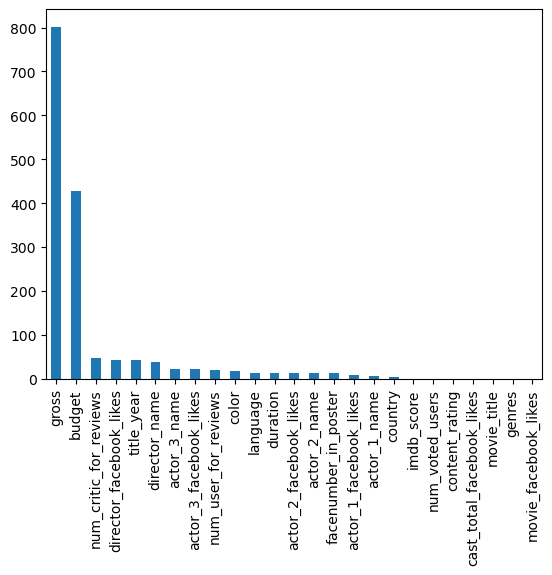

In [ ]:
df.drop(['plot_keywords'],axis=1,inplace=True)

df.isnull().sum().sort_values(ascending=False).plot.bar()
plt.show()

### Categorical Values

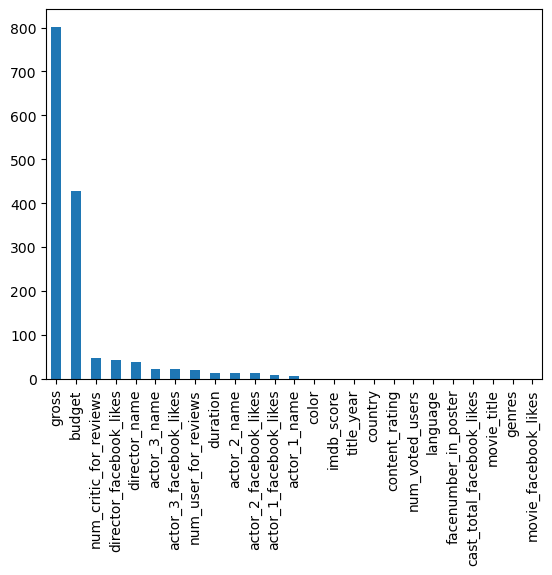

In [ ]:
to_mode = ['color','language','country','title_year','facenumber_in_poster']

for x in to_mode:
    df[x].fillna(df[x].mode()[0],inplace = True)

df.isnull().sum().sort_values(ascending=False).plot.bar()
plt.show()

### Names

missing names might indicates they are either anonymous, or not well known enough to be record down, or the credit of the movie does not have thier name. Which might suggest the quality of the movie

In [ ]:
name_col = ['director_name','actor_2_name','actor_1_name','actor_3_name']

for col in name_col:
    df[col].fillna('Unknown',inplace=True)

#### Numerical data

C:\Users\Raven SE\AppData\Local\Temp\ipykernel_3004\2389683368.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_arr[i]])
C:\Users\Raven SE\AppData\Local\Temp\ipykernel_3004\2389683368.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_arr[i]])
C:\Users\Raven SE\AppData\Local\Te

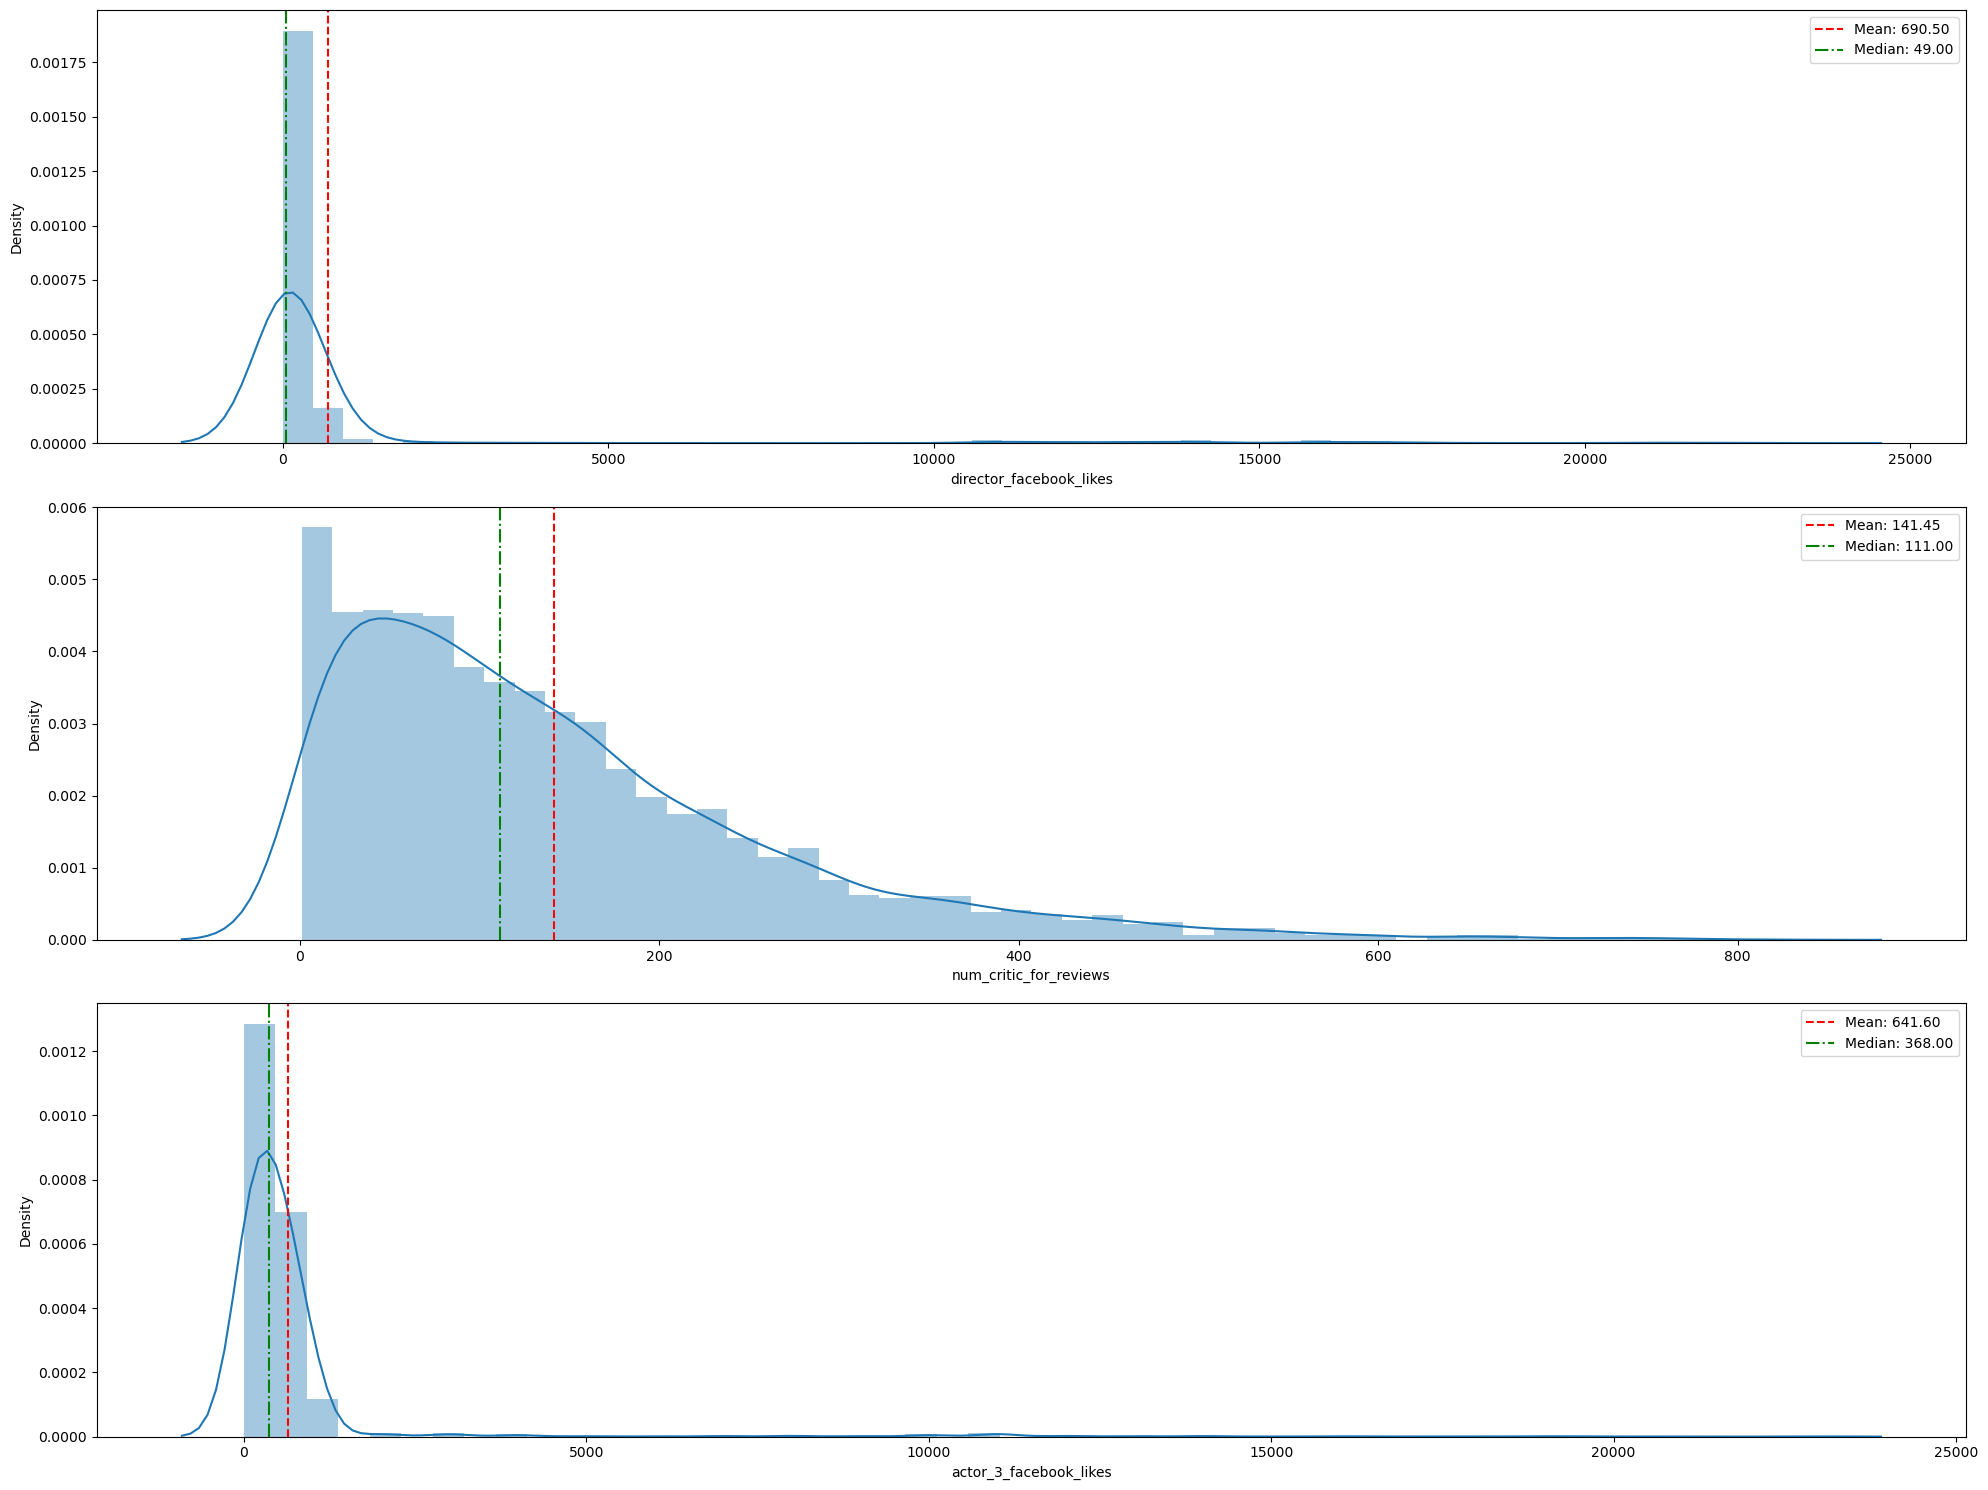

In [ ]:
plt.figure(figsize=(20,15))

num_arr = ['director_facebook_likes','num_critic_for_reviews','actor_3_facebook_likes']

for i in range(len(num_arr)):
    plt.subplot(3,1, i + 1)
    sns.distplot(df[num_arr[i]])

    # Calculate mean and median
    mean_val = df[num_arr[i]].mean()
    median_val = df[num_arr[i]].median()

    # Plot vertical lines for mean and median
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()

C:\Users\Raven SE\AppData\Local\Temp\ipykernel_3004\2044999727.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_arr[i]])
C:\Users\Raven SE\AppData\Local\Temp\ipykernel_3004\2044999727.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[num_arr[i]])
C:\Users\Raven SE\AppData\Local\Te

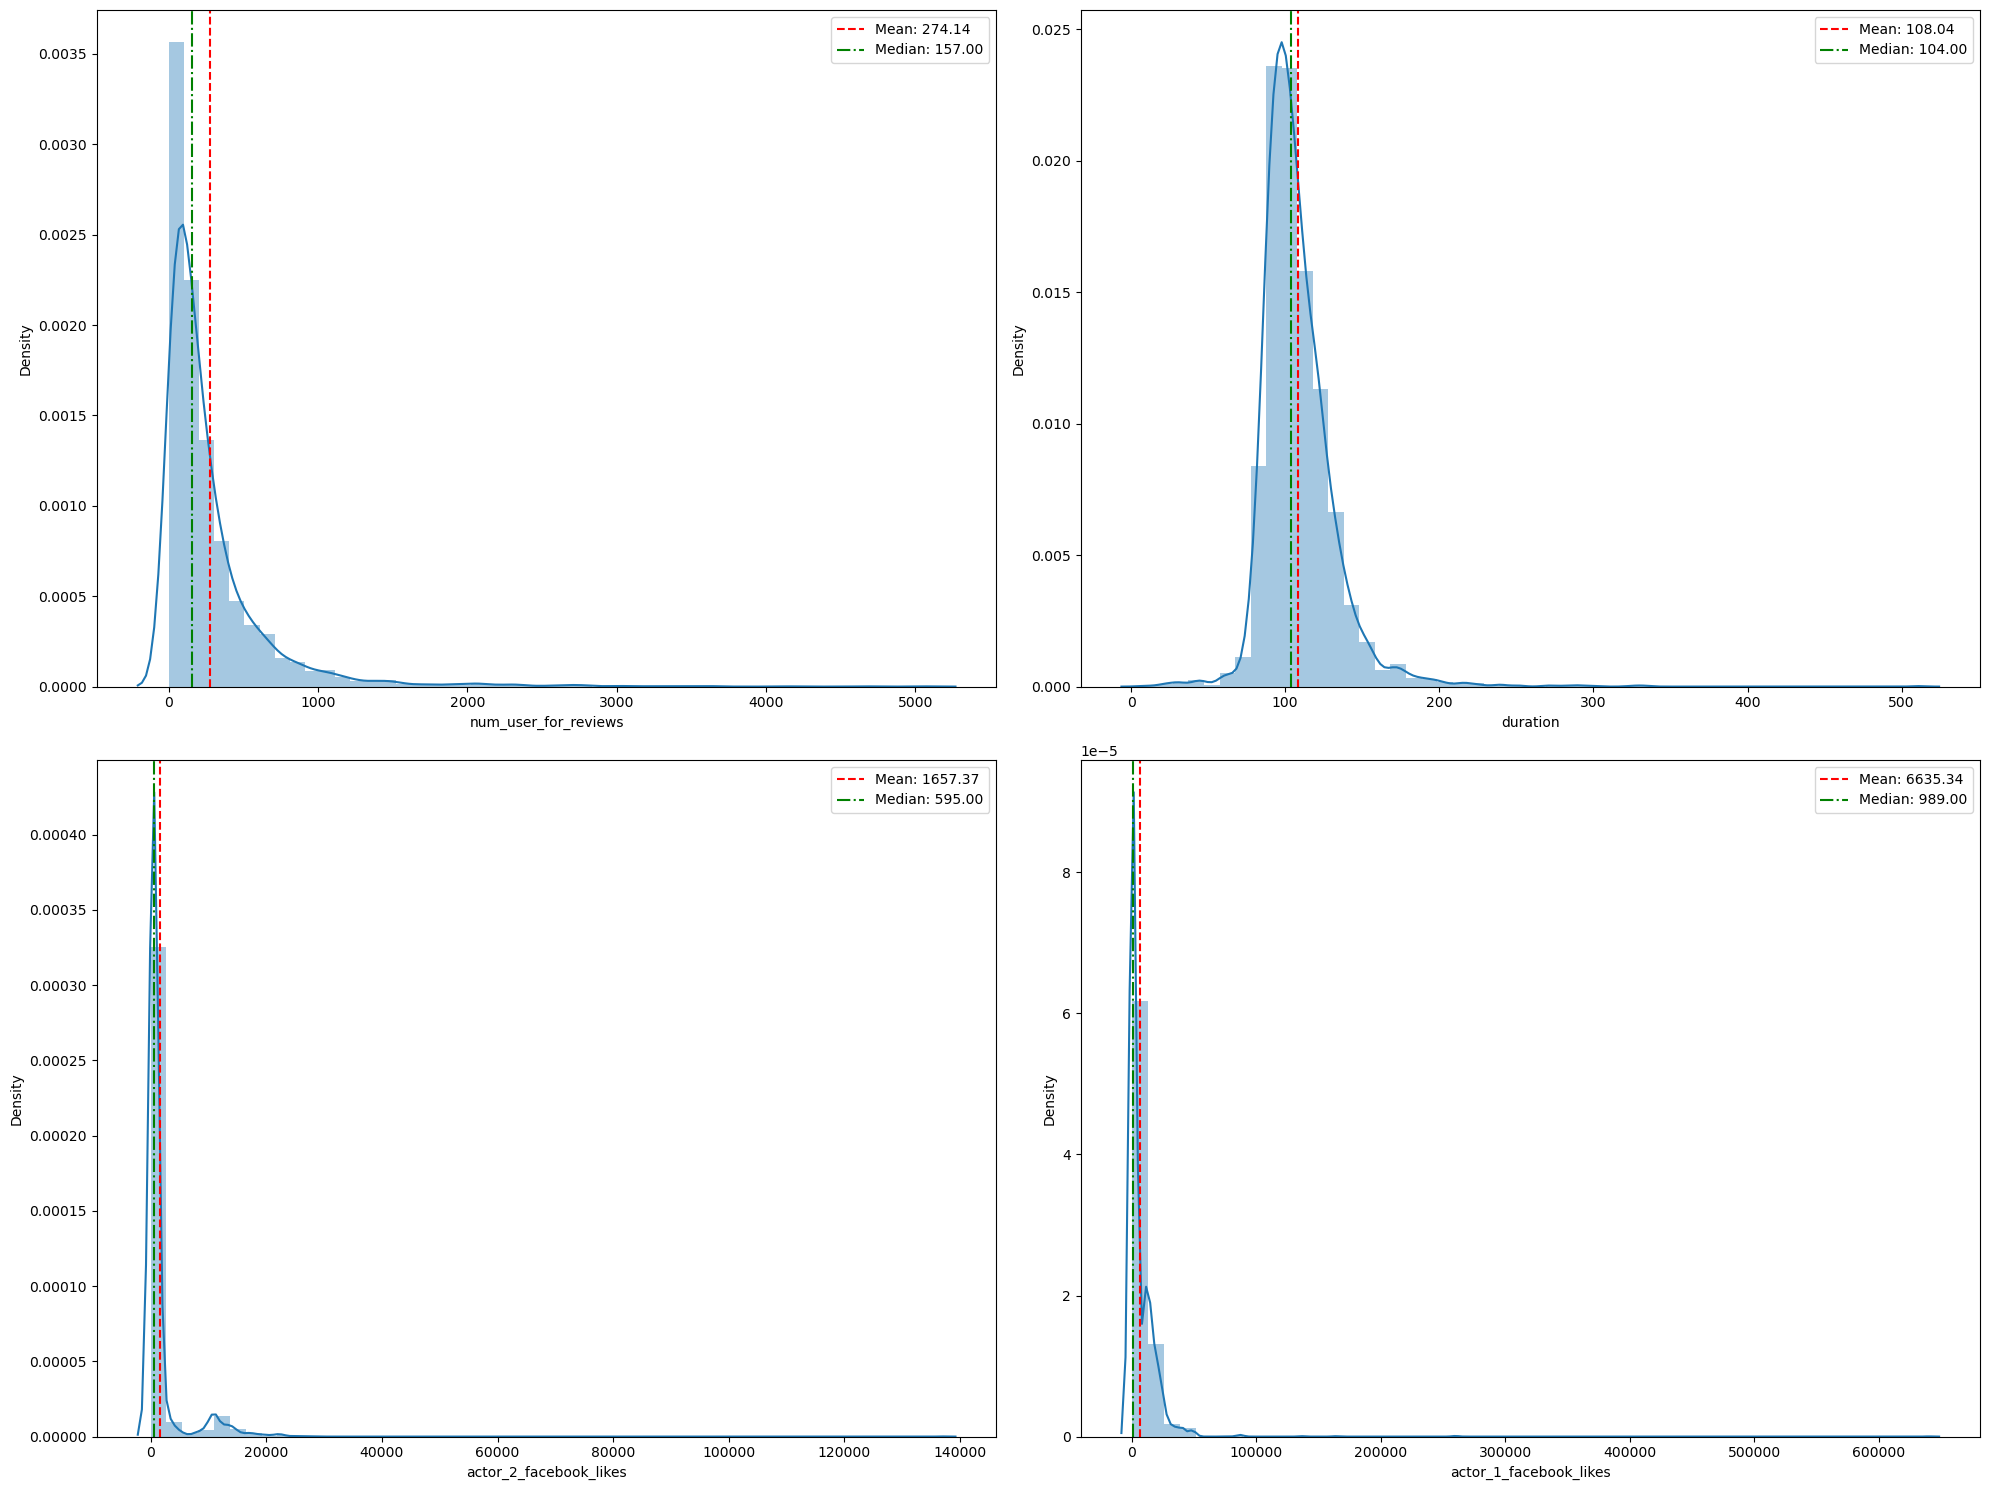

In [ ]:
plt.figure(figsize=(20,15))

num_arr = ['num_user_for_reviews','duration','actor_2_facebook_likes','actor_1_facebook_likes']

for i in range(len(num_arr)):
    plt.subplot(2,2, i + 1)
    sns.distplot(df[num_arr[i]])

    # Calculate mean and median
    mean_val = df[num_arr[i]].mean()
    median_val = df[num_arr[i]].median()

    # Plot vertical lines for mean and median
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
for x in num_arr:
    print(f"{x}\t:\t{df[x].skew()}")

num_user_for_reviews	:	4.124208898036491
duration	:	2.868138303807982
actor_2_facebook_likes	:	9.95954454394294
actor_1_facebook_likes	:	19.044317543279096


Since all the columns are heavily skewed, we use median to fill the Nan value

In [ ]:
to_median = ['director_facebook_likes','num_critic_for_reviews','actor_3_facebook_likes'
           ,'num_user_for_reviews','duration','actor_2_facebook_likes','actor_1_facebook_likes']
for x in to_median:
    df[x].fillna(df[x].median(),inplace = True)

df.isnull().sum().sort_values(ascending=False)

gross                        802
budget                       427
color                          0
cast_total_facebook_likes      0
imdb_score                     0
actor_2_facebook_likes         0
title_year                     0
content_rating                 0
country                        0
language                       0
num_user_for_reviews           0
facenumber_in_poster           0
actor_3_name                   0
num_voted_users                0
director_name                  0
movie_title                    0
actor_1_name                   0
genres                         0
actor_1_facebook_likes         0
actor_2_name                   0
actor_3_facebook_likes         0
director_facebook_likes        0
duration                       0
num_critic_for_reviews         0
movie_facebook_likes           0
dtype: int64

### Budget

In [ ]:
# Find the maximum budget value
max_budget = df['budget'].max()

# Filter the DataFrame to exclude the row with the highest budget
df[df['budget'] == max_budget]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,7000


In [ ]:
def getOutlier(col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    iqr
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    return df[(df[col] > upper_limit) | (df[col] < lower_limit) ]

def capOutlier(col ,thresh):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    iqr
    upper_limit = percentile75 + thresh * iqr
    lower_limit = percentile25 - thresh * iqr

    df[col] = np.where(
    df[col]>upper_limit,
    # make them into upper limit
    upper_limit,
    np.where(
        df[col]<lower_limit,
        lower_limit,
        df[col]
        )
    )

capOutlier("budget",1.5)

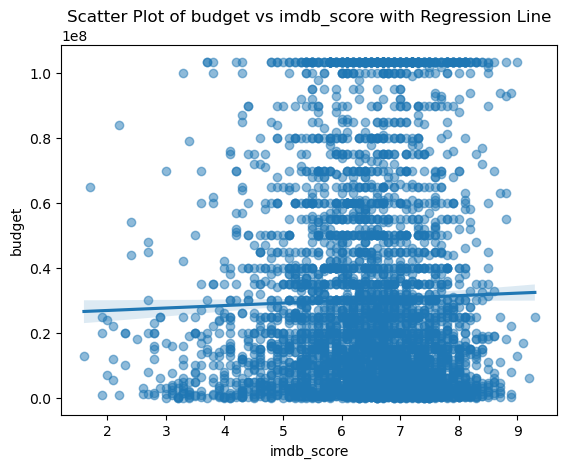

In [ ]:
sns.regplot(x='imdb_score', y='budget', data=df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of budget vs imdb_score with Regression Line')
plt.xlabel('imdb_score')
plt.ylabel('budget')
plt.show()

In [ ]:
df.drop(['budget'],axis=1,inplace=True)

### Gross

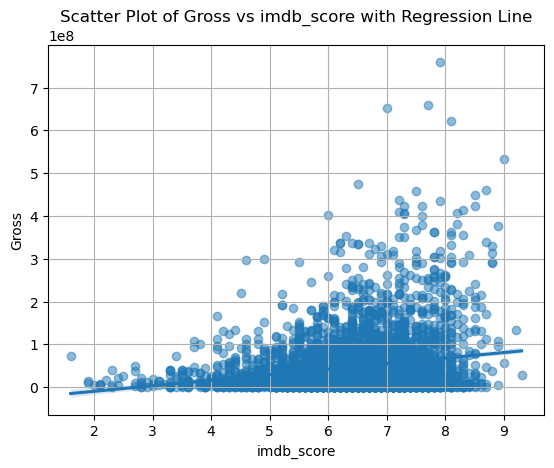

In [ ]:
sns.regplot(x='imdb_score', y='gross', data=df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Gross vs imdb_score with Regression Line')
plt.xlabel('imdb_score')
plt.ylabel('Gross')
plt.grid(True)

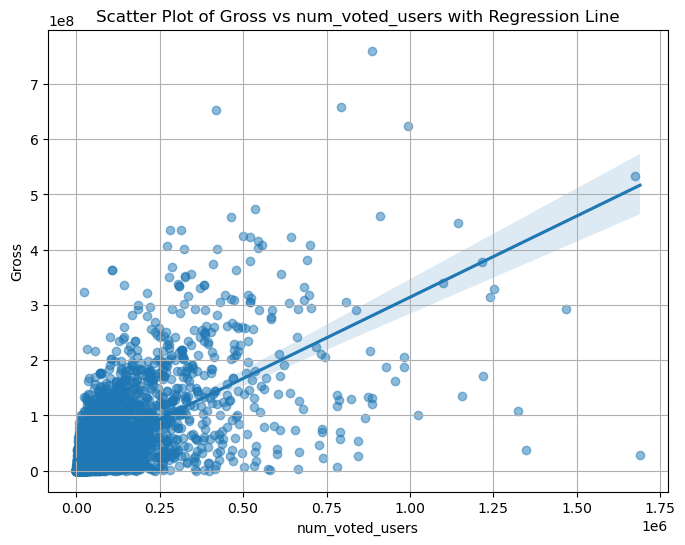

In [ ]:
plt.figure(figsize=(8, 6))
sns.regplot(x='num_voted_users', y='gross', data=df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Gross vs num_voted_users with Regression Line')
plt.xlabel('num_voted_users')
plt.ylabel('Gross')
plt.grid(True)
plt.show()

In [ ]:
'''from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

scaler.fit(df[['gross']])
df[['gross']] = scaler.transform(df[['gross']])'''

"from sklearn.preprocessing import RobustScaler\nscaler = RobustScaler()\n\nscaler.fit(df[['gross']])\ndf[['gross']] = scaler.transform(df[['gross']])"

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Split data into with and without missing values in the 'gross' column
known_values = df[df['gross'].notnull()]
unknown_values = df[df['gross'].isnull()]

# Identify predictors and target
predictors = ['num_voted_users', 'num_critic_for_reviews', 'num_user_for_reviews']  # Add the features you want to use for prediction
target = 'gross'

X = known_values[predictors]  # Features with no missing values
y = known_values[target]  # 'gross' column with no missing values

# Train Random Forest model
rf = RandomForestRegressor(random_state=1,max_depth=10,n_estimators=200)
rf.fit(X, y)

# Predict missing values
predicted_values = rf.predict(unknown_values[predictors])

# Impute missing values in the 'gross' column
df.loc[df['gross'].isnull(), 'gross'] = predicted_values

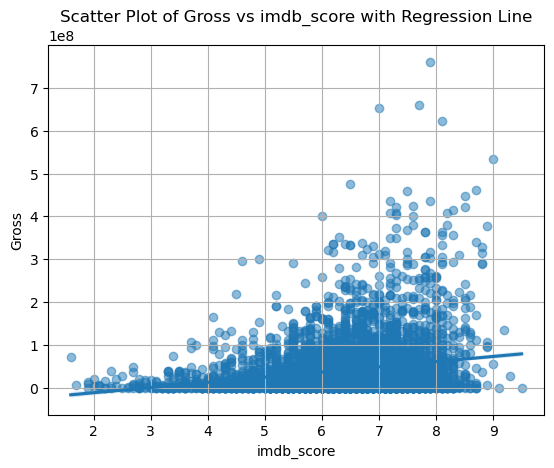

In [ ]:
sns.regplot(x='imdb_score', y='gross', data=df, scatter_kws={'alpha':0.5})
plt.title('Scatter Plot of Gross vs imdb_score with Regression Line')
plt.xlabel('imdb_score')
plt.ylabel('Gross')
plt.grid(True)

In [ ]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
movie_facebook_likes         0
dtype: int64

# 3 Encoding

### 3.1 genres

In [ ]:
df['genres'].nunique()

902

In [ ]:
# Split all the genres into a single list
all_genres = df['genres'].str.split('|').explode()

# Extract the unique genres
unique_genres = all_genres.unique()

print(unique_genres)

['Action' 'Adventure' 'Fantasy' 'Sci-Fi' 'Thriller' 'Documentary'
 'Romance' 'Animation' 'Comedy' 'Family' 'Musical' 'Mystery' 'Western'
 'Drama' 'History' 'Sport' 'Crime' 'Horror' 'War' 'Biography' 'Music'
 'Game-Show' 'Reality-TV' 'News' 'Short' 'Film-Noir']


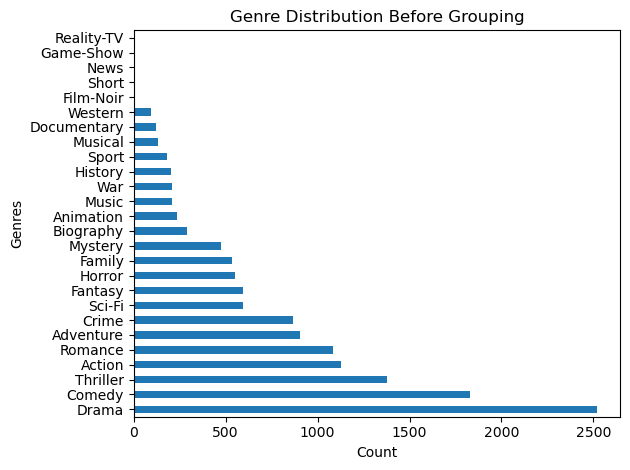

In [ ]:
unique_genres_count = all_genres.value_counts()
unique_genres_count.plot.barh()
plt.xlabel('Count')
plt.ylabel('Genres')
plt.title('Genre Distribution Before Grouping')
plt.tight_layout()
plt.show()

Combine Music and musical since they are very similar
Western, Short,Documentary and Film-Noir all have less than 100, we can combine them and form a new genre call Other

### Combine all genres < 200 into Others

In [ ]:
to_other = ['Western','Film-Noir','Short','Documentary','Reality-TV','Game-Show','News','Sport']

for item in to_other:
    df['genres'] = df['genres'].str.replace(item, 'Other')


### Combine musical and music

In [ ]:
df['genres'] = df['genres'].str.replace('Musical', 'Music')

In [ ]:
df['genres'].str.split('|').explode().nunique()

18

In [ ]:
unique_genres_count = df['genres'].str.split('|').explode().value_counts()
unique_genres_count

genres
Drama        2519
Comedy       1831
Thriller     1380
Action       1129
Romance      1083
Adventure     904
Crime         864
Sci-Fi        596
Fantasy       592
Horror        551
Family        532
Mystery       477
Other         410
Music         339
Biography     291
Animation     235
War           208
History       203
Name: count, dtype: int64

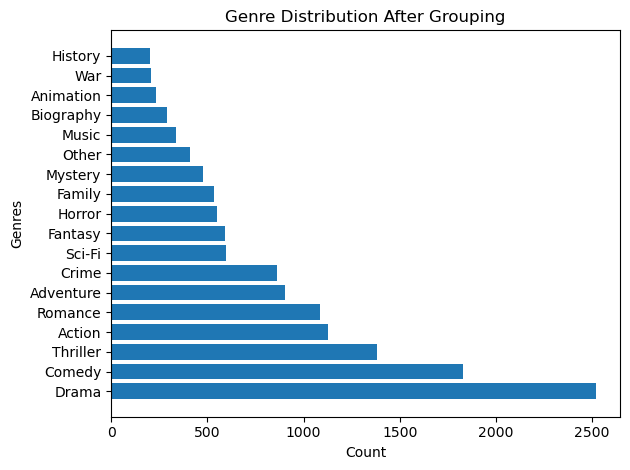

In [ ]:
# Create array of genres and thier count in the same order
unique_genres_list = unique_genres_count.index.tolist()

unique_genres_count_list = unique_genres_count.values.tolist()

# Plot before grouping
plt.barh(unique_genres_list, unique_genres_count_list)
plt.xlabel('Count')
plt.ylabel('Genres')
plt.title('Genre Distribution After Grouping')
plt.tight_layout()
plt.show()

### There are some genres rows with duplicated genre after combining
#### Example
'Action|Adventure|Comedy|Fantasy', 'Comedy|Drama|Music|Music',

In [ ]:
def toSet(arr):
    return set(arr)

def toList(set):
    return list(set)

# Convert all arr to set to remove duplicates
df['genres'] = df['genres'].str.split('|').apply(toSet)
# Convert back to arr
df['genres'] = df['genres'].apply(toList)
print(df['genres'])

0       [Sci-Fi, Fantasy, Action, Adventure]
1               [Fantasy, Action, Adventure]
2              [Thriller, Action, Adventure]
3                         [Thriller, Action]
4                                    [Other]
                        ...                 
5037                         [Comedy, Drama]
5038                         [Comedy, Drama]
5040               [Thriller, Horror, Drama]
5041                [Comedy, Drama, Romance]
5042                                 [Other]
Name: genres, Length: 4924, dtype: object


In [ ]:
df['genres'] = df['genres'].apply(lambda x: '|'.join(x))
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,Sci-Fi|Fantasy|Action|Adventure,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,2009.0,936.0,7.9,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,3.094042e+08,Fantasy|Action|Adventure,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,USA,PG-13,2007.0,5000.0,7.1,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,2.000742e+08,Thriller|Action|Adventure,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,UK,PG-13,2015.0,393.0,6.8,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,4.481306e+08,Thriller|Action,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,2012.0,23000.0,8.5,164000
4,Color,Doug Walker,111.0,104.0,131.0,368.0,Rob Walker,131.0,1.257202e+06,Other,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,Unknown,0.0,157.0,English,USA,Unrated,2009.0,12.0,7.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4.584000e+03,Comedy|Drama,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1.0,14.0,English,USA,Unrated,2011.0,205.0,6.4,413
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,8.442781e+05,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,6.0,English,Canada,Unrated,2013.0,470.0,7.7,84
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,2.634543e+05,Thriller|Horror|Drama,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,3.0,English,USA,Unrated,2013.0,0.0,6.3,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,1.044300e+04,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,9.0,English,USA,PG-13,2012.0,719.0,6.3,660


In [ ]:
unique_genres_count.index.tolist()

['Drama',
 'Comedy',
 'Thriller',
 'Action',
 'Romance',
 'Adventure',
 'Crime',
 'Sci-Fi',
 'Fantasy',
 'Horror',
 'Family',
 'Mystery',
 'Other',
 'Music',
 'Biography',
 'Animation',
 'War',
 'History']

### One Hot Encoding

here we use **one hot encoding** instead of **label encoding** for **genres** because it is a **nominal categorical** values, means thay do not have any specific **order** to them.

Terget encoding is not use here because it might introduce **target leakage** and **overfitting**

In [ ]:
# creating list of strings where each value is one number out of topic column
unique_values = unique_genres_count.index.tolist()

# creating new column for each value in unique_values
for genre in unique_values:
    df[genre] = 0

# changing 0 to 1 for every Snumber column where topic contains number
for idx, row in df.iterrows():
    for genre in row['genres'].split('|'):
        df.loc[idx, genre] = 1
df.drop('genres', axis=1, inplace=True)


'''df.drop('genres', axis=1, inplace=True)'''

"df.drop('genres', axis=1, inplace=True)"

In [ ]:
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Sci-Fi,Fantasy,Horror,Family,Mystery,Other,Music,Biography,Animation,War,History
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,USA,PG-13,2009.0,936.0,7.9,33000,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,3.094042e+08,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,USA,PG-13,2007.0,5000.0,7.1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,2.000742e+08,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,UK,PG-13,2015.0,393.0,6.8,85000,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,4.481306e+08,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,USA,PG-13,2012.0,23000.0,8.5,164000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Color,Doug Walker,111.0,104.0,131.0,368.0,Rob Walker,131.0,1.257202e+06,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,Unknown,0.0,157.0,English,USA,Unrated,2009.0,12.0,7.1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5037,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4.584000e+03,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1.0,14.0,English,USA,Unrated,2011.0,205.0,6.4,413,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,8.442781e+05,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,6.0,English,Canada,Unrated,2013.0,470.0,7.7,84,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,2.634543e+05,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,3.0,English,USA,Unrated,2013.0,0.0,6.3,16,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,1.044300e+04,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,9.0,English,USA,PG-13,2012.0,719.0,6.3,660,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### 3.2 country

In [ ]:
df.shape[0]

4924

<Axes: ylabel='country'>

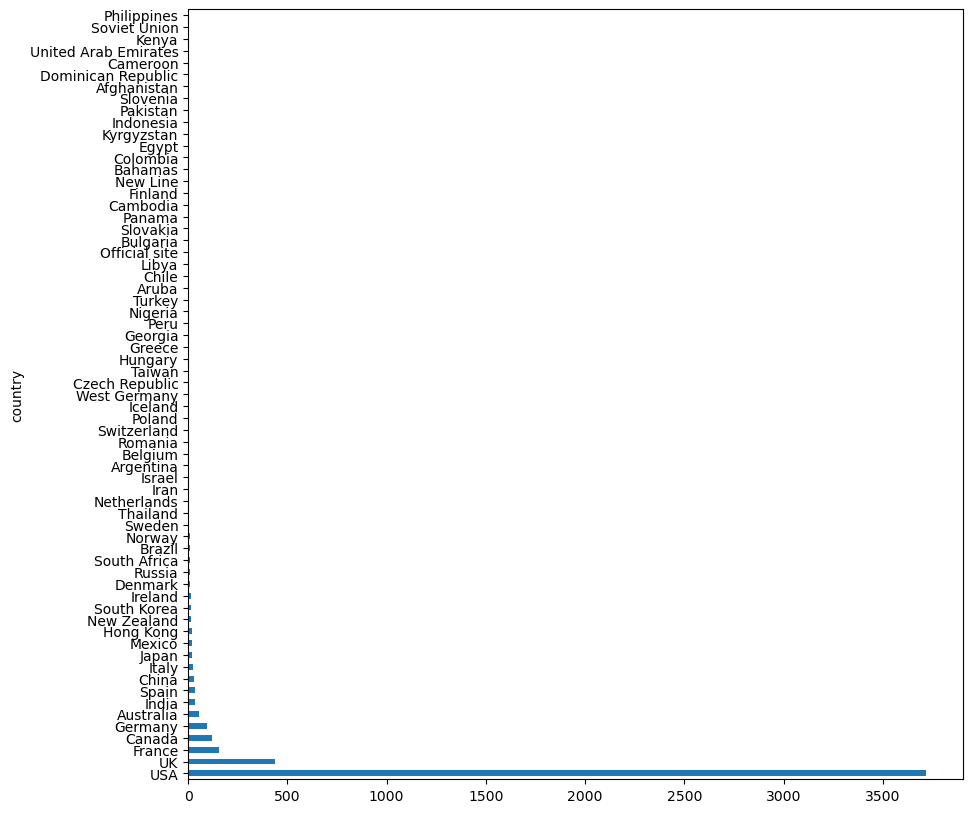

In [ ]:
plt.figure(figsize=(10,10))
df["country"].value_counts().sort_values(ascending=False).plot.barh()

80% of the country are USA, UK is around 10% and the rest is less than 10%.

we can combine all country less than 100 into one Other_Country to make each country at least 10% of the total data

In [ ]:
df.loc[(df['country'] != 'USA') & (df['country'] != 'UK') , 'country'] = 'Other_Country'

In [ ]:
df["country"].value_counts().sort_values(ascending=False)

country
USA              3718
Other_Country     768
UK                438
Name: count, dtype: int64

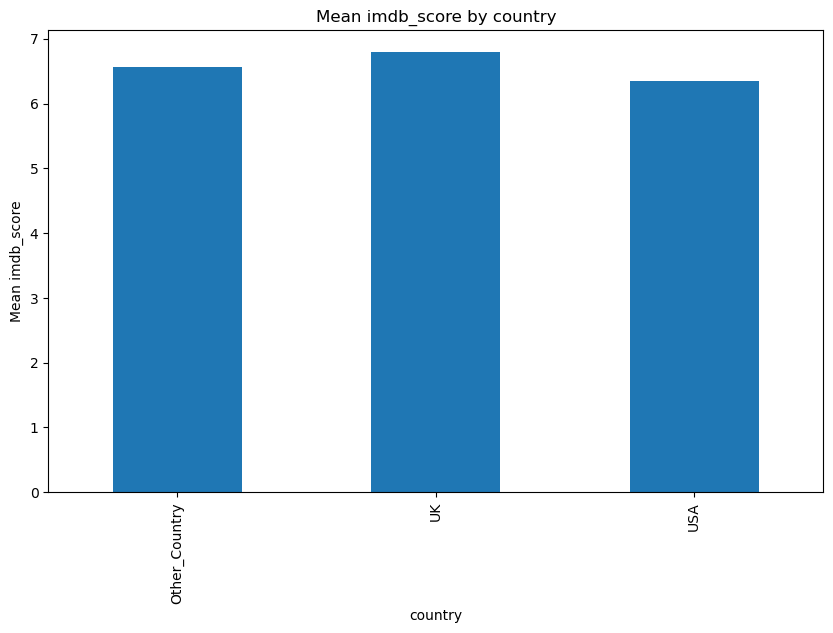

In [ ]:
country_mean_imdb_score = df.groupby('country')['imdb_score'].mean()
country_mean_imdb_score.plot(kind='bar', figsize=(10, 6))
plt.xlabel('country')
plt.ylabel('Mean imdb_score')
plt.title('Mean imdb_score by country')
plt.show()

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df[['country']]

,country
0,USA
1,USA
2,UK
3,USA
4,USA
...,...
5037,USA
5038,Other_Country
5040,USA
5041,USA


In [ ]:
ohe = OneHotEncoder()
new_df = df[["country"]]
encoded_data = ohe.fit_transform(new_df[['country']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=ohe.get_feature_names_out(['country']))
encoded_df.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df = pd.concat([df, encoded_df], axis=1)
df.drop('country', axis=1, inplace=True)

### 3.3 Content rating

<Axes: ylabel='content_rating'>

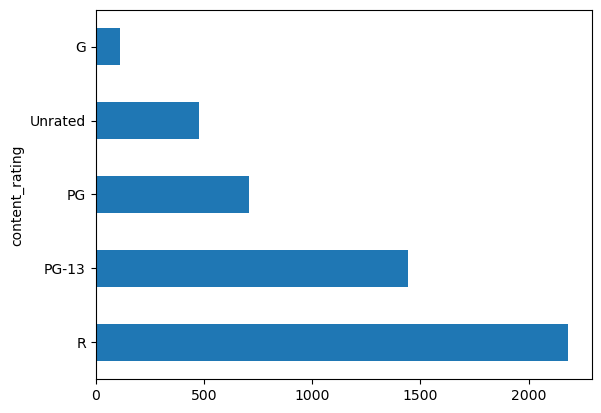

In [ ]:
# visalize the distribution of content rating
df['content_rating'].value_counts().plot.barh()

In [ ]:
ohe = OneHotEncoder()
new_df = df[["content_rating"]]
encoded_data = ohe.fit_transform(new_df)
encoded_df = pd.DataFrame(encoded_data.toarray(),columns=ohe.get_feature_names_out(["content_rating"]))
encoded_df.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
df = pd.concat([df, encoded_df], axis=1)
df.drop('content_rating', axis=1, inplace=True)
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,num_user_for_reviews,language,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Sci-Fi,Fantasy,Horror,Family,Mystery,Other,Music,Biography,Animation,War,History,country_Other_Country,country_UK,country_USA,content_rating_G,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_Unrated
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,7.605058e+08,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,3054.0,English,2009.0,936.0,7.9,33000,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,3.094042e+08,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,1238.0,English,2007.0,5000.0,7.1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,2.000742e+08,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,994.0,English,2015.0,393.0,6.8,85000,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,4.481306e+08,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,2701.0,English,2012.0,23000.0,8.5,164000,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Color,Doug Walker,111.0,104.0,131.0,368.0,Rob Walker,131.0,1.257202e+06,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,Unknown,0.0,157.0,English,2009.0,12.0,7.1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4919,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4.584000e+03,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1.0,14.0,English,2011.0,205.0,6.4,413,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4920,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,8.442781e+05,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,6.0,English,2013.0,470.0,7.7,84,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4921,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,2.634543e+05,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,3.0,English,2013.0,0.0,6.3,16,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4922,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,1.044300e+04,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,9.0,English,2012.0,719.0,6.3,660,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### 3.4 Language

<Axes: ylabel='language'>

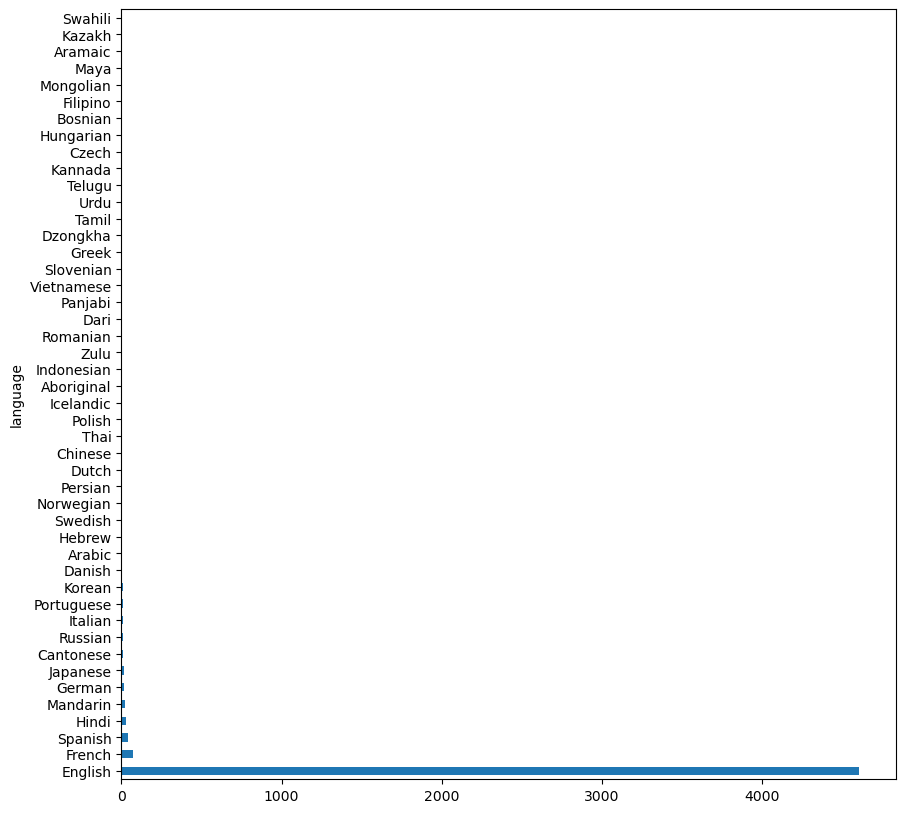

In [ ]:
plt.figure(figsize=(10,10))
df['language'].value_counts().plot.barh()

From here we can see that almost all of the language are English
Language will not be useful for prediction since it is almost constant

In [ ]:
df.drop(['language'],axis=1,inplace=True)

In [ ]:
df.shape

(4924, 46)

### 3.5 Color

<Axes: xlabel='color'>

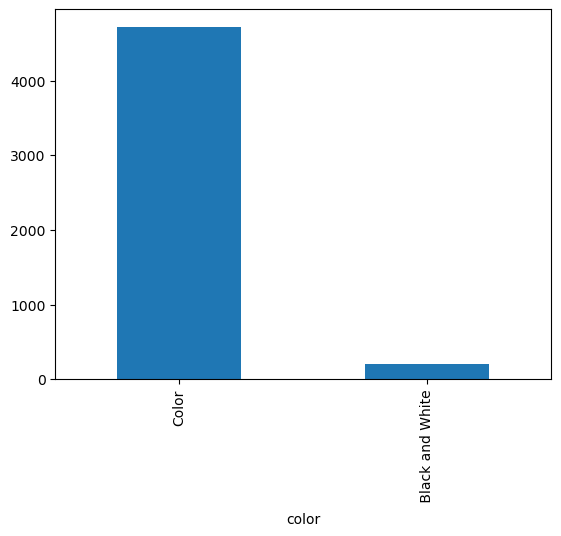

In [ ]:
df['color'].value_counts().plot.bar()

In [ ]:
df['color'].value_counts()

color
Color               4719
 Black and White     205
Name: count, dtype: int64

Same as Language only 3% of color is Black and White.

In [ ]:
df.drop(['color'],axis=1,inplace=True)

### 3.6 Names

In [ ]:
print("actor_1_name unique count: ",df['actor_1_name'].nunique())
print("actor_2_name unique count: ",df['actor_2_name'].nunique())
print("actor_3_name unique count: ",df['actor_3_name'].nunique())
print("director_name unique count: ",df['director_name'].nunique())

actor_1_name unique count:  2069
actor_2_name unique count:  2989
actor_3_name unique count:  3474
director_name unique count:  2394


There are too much uniqueness in the name, and name can be ambiguous since similar name does not necessary refer to the same person

In [ ]:
df.drop(['actor_1_name'],axis=1,inplace=True)
df.drop(['actor_2_name'],axis=1,inplace=True)
df.drop(['actor_3_name'],axis=1,inplace=True)
df.drop(['director_name'],axis=1,inplace=True)

### 3.7 Movie title

In [ ]:
df['movie_title'].nunique()

4844

almost every single movie_title is unique and it does not give any prediction value to the model

In [ ]:
df.drop(['movie_title'],axis=1,inplace=True)

All the features are now numerical

In [ ]:
df.dtypes

num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_1_facebook_likes       float64
gross                        float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
num_user_for_reviews         float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
movie_facebook_likes           int64
Drama                          int64
Comedy                         int64
Thriller                       int64
Action                         int64
Romance                        int64
Adventure                      int64
Crime                          int64
Sci-Fi                         int64
Fantasy                        int64
Horror                         int64
Family                         int64
Mystery                        int64
Other                          int64
M

### 4 Scaling

**actor_1_facebook_likes, cast_total_facebook_likes, budget, and actor_1_facebook_likes** are all heavily skewed, which will benefit from **log transformation**
ref https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9036143/
We can visualize the data with distplot

since the data is mostly skewed, we will detech the outlier with IQR

#### Visualization of outlier using boxplot

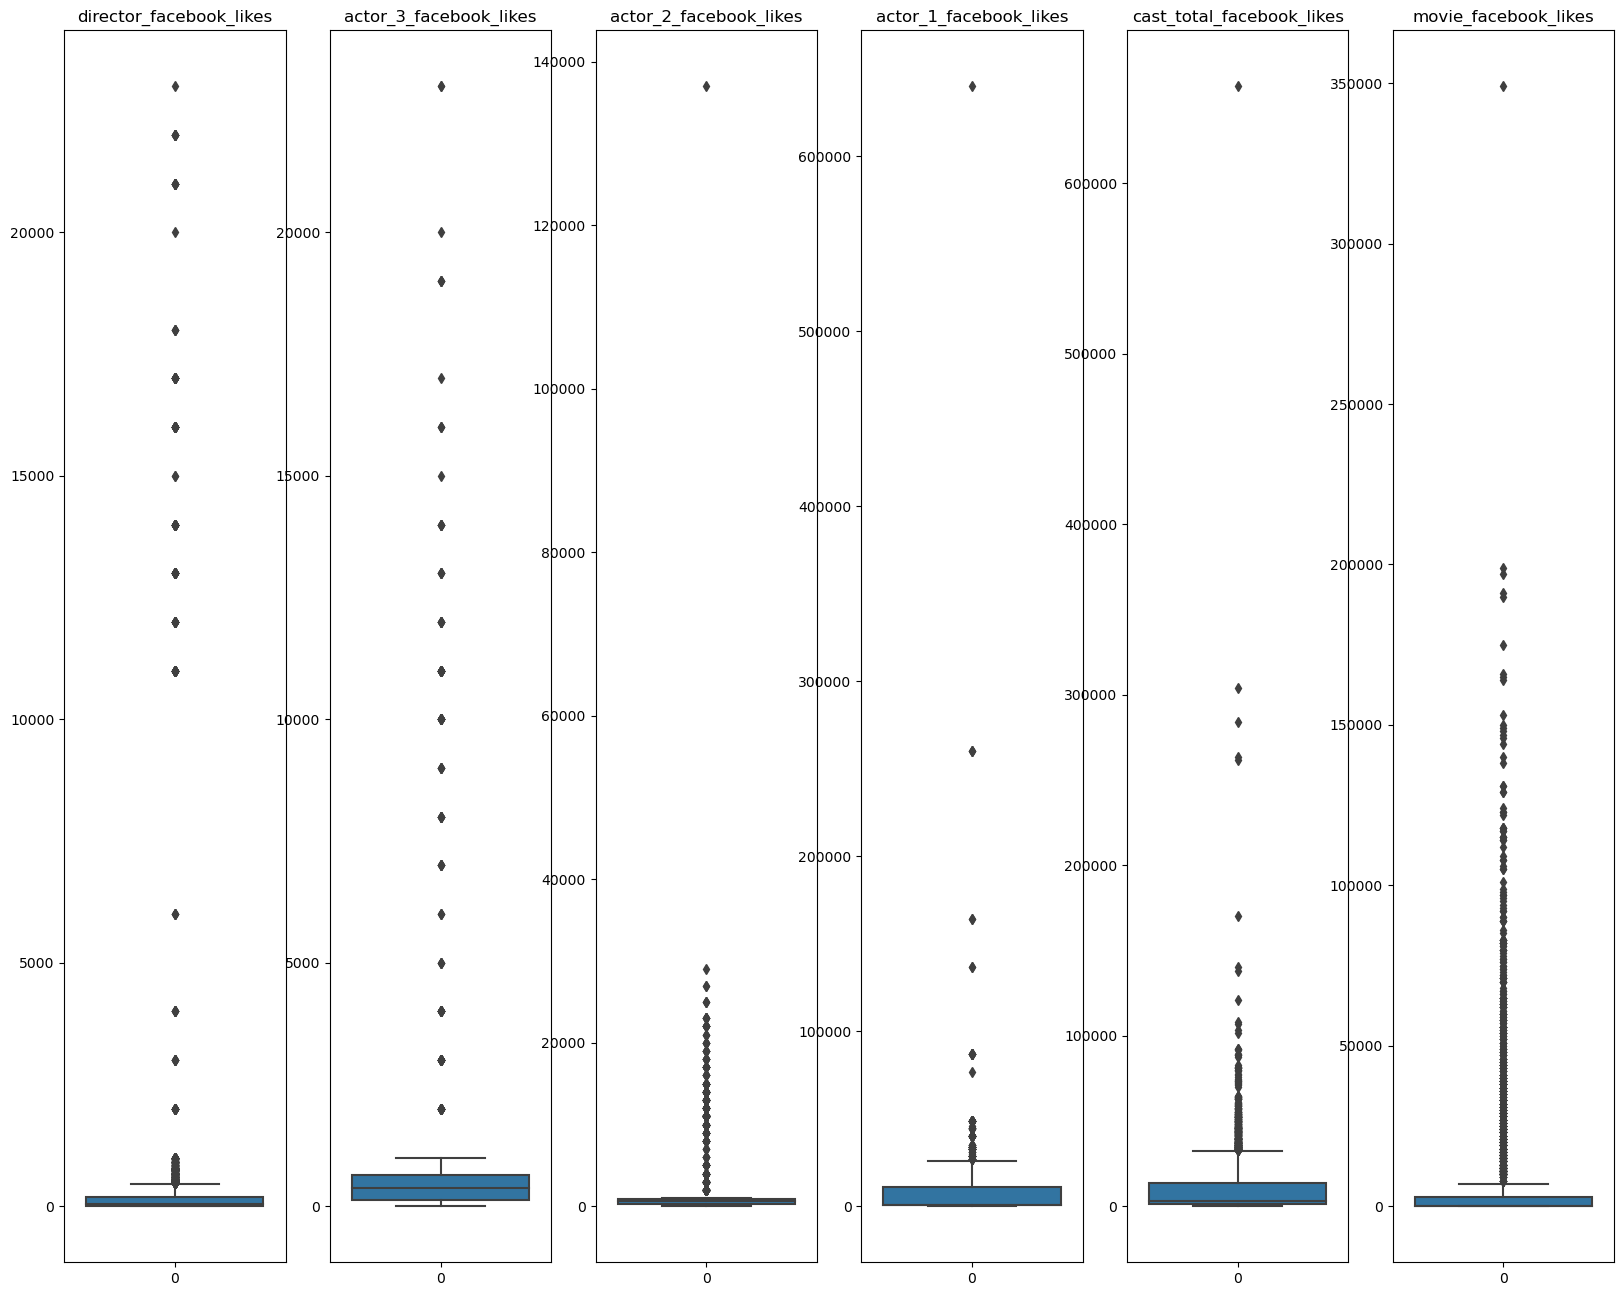

In [ ]:
plt.figure(figsize=(20,16))
plt.subplot(1,6,1)
sns.boxplot(df['director_facebook_likes'])
plt.title('director_facebook_likes')

plt.subplot(1,6,2)
sns.boxplot(df['actor_3_facebook_likes'])
plt.title('actor_3_facebook_likes')

plt.subplot(1,6,3)
sns.boxplot(df['actor_2_facebook_likes'])
plt.title('actor_2_facebook_likes')

plt.subplot(1,6,4)
sns.boxplot(df['actor_1_facebook_likes'])
plt.title('actor_1_facebook_likes')

plt.subplot(1,6,5)
sns.boxplot(df['cast_total_facebook_likes'])
plt.title('cast_total_facebook_likes')

plt.subplot(1,6,6)
sns.boxplot(df['movie_facebook_likes'])
plt.title('movie_facebook_likes')
plt.show()

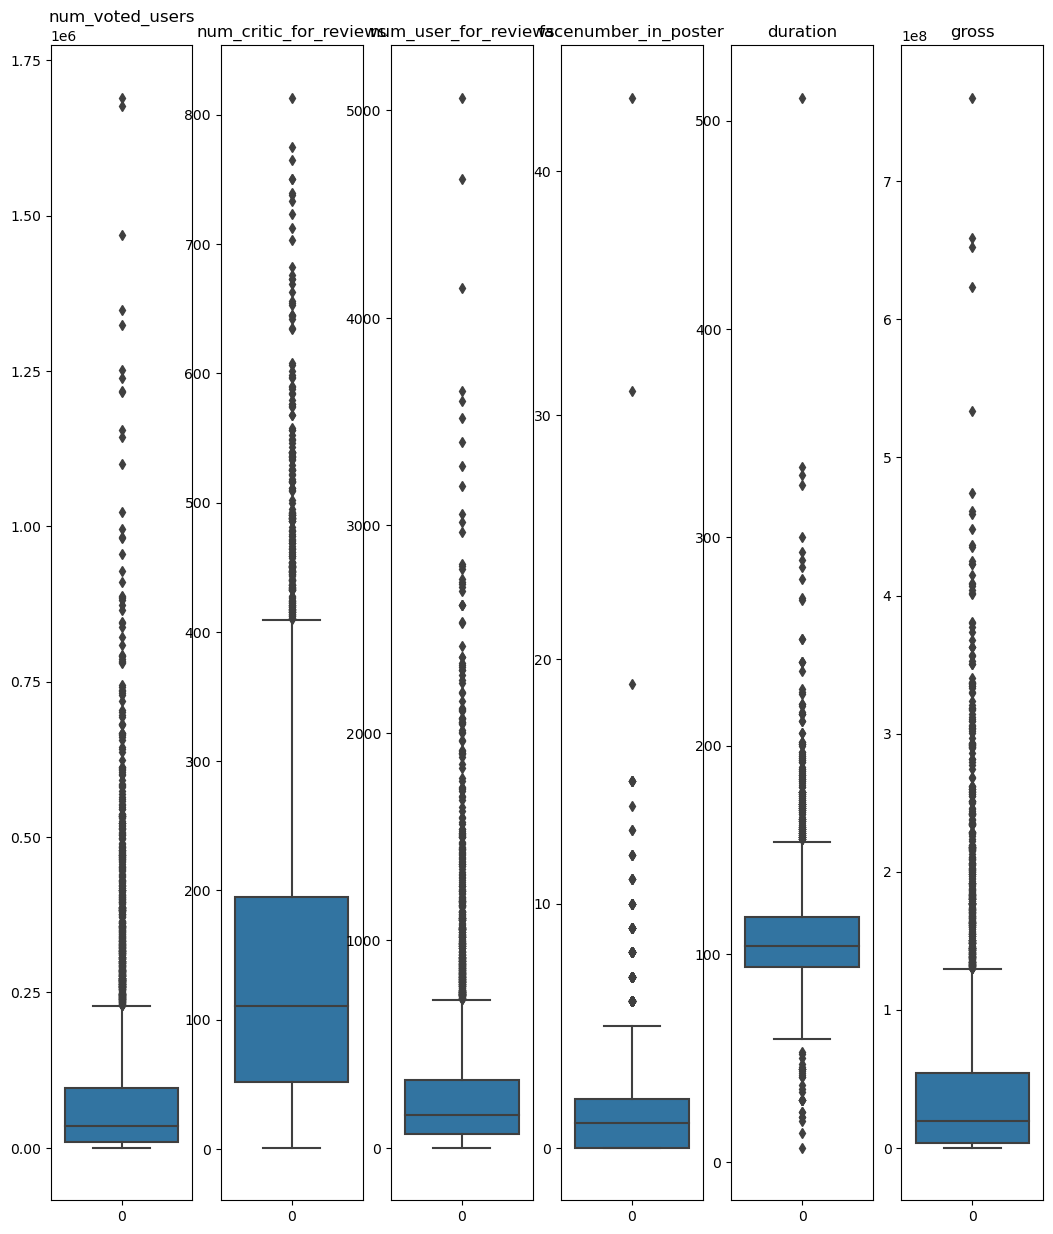

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(1,7,1)
sns.boxplot(df['num_voted_users'])
plt.title('num_voted_users')

plt.subplot(1,7,2)
sns.boxplot(df['num_critic_for_reviews'])
plt.title('num_critic_for_reviews')

plt.subplot(1,7,3)
sns.boxplot(df['num_user_for_reviews'])
plt.title('num_user_for_reviews')

plt.subplot(1,7,4)
sns.boxplot(df['facenumber_in_poster'])
plt.title('facenumber_in_poster')

plt.subplot(1,7,5)
sns.boxplot(df['duration'])
plt.title('duration')

plt.subplot(1,7,6)
sns.boxplot(df['gross'])
plt.title('gross')

plt.show()

then we want to see the **minimum value** and **maximum value** from each data and see whether thay make sense or not

#### 4.2 Identify outlier
we want to identify the min and max value for each column to see if they are reasonable or miss input

In [ ]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Sci-Fi,Fantasy,Horror,Family,Mystery,Other,Music,Biography,Animation,War,History,country_Other_Country,country_UK,country_USA,content_rating_G,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_Unrated
count,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4.924000e+03,4.924000e+03,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000
mean,141.168359,108.032088,684.896832,640.325751,6626.167953,4.259618e+07,8.410093e+04,9769.530869,1.359870,273.661251,2002.518887,1654.567628,6.425264,7487.784322,0.511576,0.371852,0.280260,0.229285,0.219943,0.183591,0.175467,0.121040,0.120227,0.111901,0.108042,0.096872,0.080219,0.065191,0.059098,0.047725,0.042242,0.041227,0.155971,0.088952,0.755077,0.022746,0.143989,0.293258,0.443136,0.096872
std,121.079929,24.185387,2813.753304,1644.679447,15147.163388,6.402622e+07,1.388952e+05,18273.593321,2.011965,379.122887,12.431582,4051.455763,1.115658,19328.844222,0.499917,0.483348,0.449172,0.420416,0.414250,0.387189,0.380405,0.326207,0.325260,0.315276,0.310465,0.295814,0.271660,0.246887,0.235833,0.213206,0.201161,0.198834,0.362864,0.284703,0.430085,0.149107,0.351114,0.455302,0.496806,0.295814
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,1916.000000,0.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,94.000000,7.000000,133.000000,614.750000,3.446209e+06,8.560000e+03,1406.500000,0.000000,65.750000,1999.000000,280.750000,5.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,111.000000,104.000000,49.000000,368.000000,989.000000,1.953418e+07,3.446000e+04,3104.000000,1.000000,157.000000,2005.000000,595.000000,6.600000,161.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,195.000000,118.000000,191.250000,635.000000,11000.000000,5.396449e+07,9.666300e+04,13921.250000,2.000000,326.250000,2011.000000,918.000000,7.200000,3000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,9.500000,349000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


from this table, we can see that most of the max value and min value are all in the reasonable amount
except duration of movie with 500 min

In [ ]:
df.sort_values(by='duration',ascending=False).head(10)

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Sci-Fi,Fantasy,Horror,Family,Mystery,Other,Music,Biography,Animation,War,History,country_Other_Country,country_UK,country_USA,content_rating_G,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_Unrated
1674,16.0,511.0,49.0,51.0,147.0,4.057194e+06,2308,307,0.0,19.0,2009.0,63.0,8.2,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2420,108.0,334.0,49.0,30.0,897.0,1.451180e+05,10111,1032,0.0,36.0,2009.0,30.0,7.7,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1468,12.0,330.0,138.0,672.0,848.0,4.496583e+06,23181,3227,2.0,129.0,1993.0,674.0,8.0,6000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1119,102.0,325.0,517.0,678.0,12000.0,1.500000e+06,9830,14255,0.0,189.0,1980.0,849.0,6.8,1000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3245,31.0,300.0,6.0,6.0,7.0,4.542550e+05,1666,32,3.0,47.0,2001.0,6.0,6.6,124,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2910,96.0,293.0,249.0,18.0,362.0,1.143313e+07,168203,469,0.0,426.0,1981.0,21.0,8.4,11000,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1538,261.0,289.0,0.0,3000.0,11000.0,7.880000e+07,450676,25313,1.0,983.0,1979.0,10000.0,8.5,19000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2672,9.0,286.0,49.0,527.0,857.0,7.122929e+06,3828,3809,3.0,39.0,2009.0,555.0,7.9,733,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
861,84.0,280.0,33.0,67.0,789.0,1.287057e+07,13215,1671,0.0,497.0,2003.0,640.0,6.3,953,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1939,22.0,271.0,33.0,251.0,854.0,1.076996e+07,21940,2107,0.0,256.0,1993.0,702.0,7.7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### cap the outlier

In [ ]:
df.iloc[:,:14].columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
def getOutlier(col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    iqr
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    return df[(df[col] > upper_limit) | (df[col] < lower_limit) ]

def capOutlier(col):
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    iqr
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr

    df[col] = np.where(
    df[col]>upper_limit,
    # make them into upper limit
    upper_limit,
    np.where(
        df[col]<lower_limit,
        lower_limit,
        df[col]
        )
    )

getOutlier("duration").sort_values(by='duration')

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Sci-Fi,Fantasy,Horror,Family,Mystery,Other,Music,Biography,Animation,War,History,country_Other_Country,country_UK,country_USA,content_rating_G,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_Unrated
2301,111.0,7.0,23.0,51.0,344.0,6.750630e+05,118,726,0.0,157.0,2007.0,281.0,5.2,30,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4566,1.0,14.0,0.0,37.0,134.0,6.695535e+05,292,315,1.0,3.0,2012.0,93.0,6.2,14,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4336,56.0,20.0,21.0,0.0,0.0,3.687344e+06,4120,0,0.0,70.0,2005.0,0.0,6.8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
274,111.0,22.0,0.0,368.0,5.0,1.257202e+06,6,5,0.0,157.0,2009.0,595.0,7.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
812,26.0,22.0,49.0,676.0,883.0,6.249197e+07,26992,4115,1.0,54.0,2009.0,701.0,6.7,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3245,31.0,300.0,6.0,6.0,7.0,4.542550e+05,1666,32,3.0,47.0,2001.0,6.0,6.6,124,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1119,102.0,325.0,517.0,678.0,12000.0,1.500000e+06,9830,14255,0.0,189.0,1980.0,849.0,6.8,1000,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1468,12.0,330.0,138.0,672.0,848.0,4.496583e+06,23181,3227,2.0,129.0,1993.0,674.0,8.0,6000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2420,108.0,334.0,49.0,30.0,897.0,1.451180e+05,10111,1032,0.0,36.0,2009.0,30.0,7.7,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df['duration'] = df['duration'].apply(lambda x: 300 if x > 300 else x)

C:\Users\Raven SE\AppData\Local\Temp\ipykernel_3004\2111361885.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['duration'])


<Axes: xlabel='duration', ylabel='Density'>

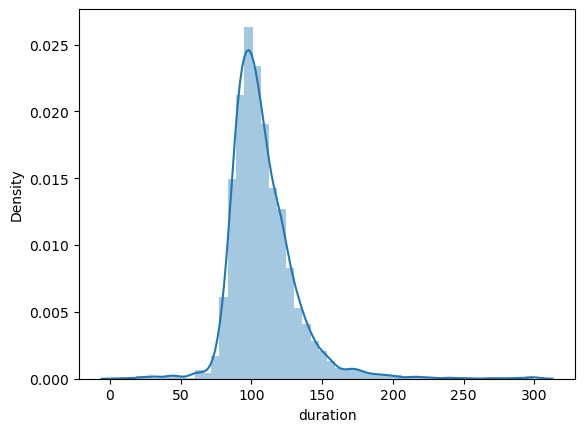

In [ ]:
sns.distplot(df['duration'])

In [ ]:
num_arr = df.iloc[:,:14].columns
skew_arr = []
for x in num_arr:
    skew_arr
    print(f"{x}\t:\t{df[x].skew()}")

num_critic_for_reviews	:	1.51935130193289
duration	:	2.0482191890422548
director_facebook_likes	:	5.234981872639002
actor_3_facebook_likes	:	7.3071458337072785
actor_1_facebook_likes	:	19.055086179346134
gross	:	3.304864334998547
num_voted_users	:	4.011721239969494
cast_total_facebook_likes	:	12.87171588834206
facenumber_in_poster	:	4.456017960055719
num_user_for_reviews	:	4.133857543474528
title_year	:	-2.3172236707146197
actor_2_facebook_likes	:	9.972031103239312
imdb_score	:	-0.7605132789388456
movie_facebook_likes	:	5.099727814782741


In [ ]:
df.iloc[:,:14].columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes'],
      dtype='object')

And before we do scaling, we want to reduce the skewness of heavily skewed data like **actor_1_facebook_likes, cast_total_facebook_likes, budget, and actor_1_facebook_likes** using log transformation

In [ ]:
'''df['actor_1_facebook_likes'] = np.log1p(df['actor_1_facebook_likes'])
df['cast_total_facebook_likes'] = np.log1p(df['cast_total_facebook_likes'])
df['actor_2_facebook_likes'] = np.log1p(df['actor_2_facebook_likes'])
print("actor_1_facebook_likes = ",df['actor_1_facebook_likes'].skew())
print("cast_total_facebook_likes = ",df['cast_total_facebook_likes'].skew())
print("actor_2_facebook_likes = ",df['actor_2_facebook_likes'].skew())'''

'df[\'actor_1_facebook_likes\'] = np.log1p(df[\'actor_1_facebook_likes\'])\ndf[\'cast_total_facebook_likes\'] = np.log1p(df[\'cast_total_facebook_likes\'])\ndf[\'actor_2_facebook_likes\'] = np.log1p(df[\'actor_2_facebook_likes\'])\nprint("actor_1_facebook_likes = ",df[\'actor_1_facebook_likes\'].skew())\nprint("cast_total_facebook_likes = ",df[\'cast_total_facebook_likes\'].skew())\nprint("actor_2_facebook_likes = ",df[\'actor_2_facebook_likes\'].skew())'

In [ ]:
'''df.rename(columns={'actor_1_facebook_likes': 'log1p(actor_1_facebook_likes)'}, inplace=True)
df.rename(columns={'cast_total_facebook_likes': 'log1p(cast_total_facebook_likes)'}, inplace=True)
df.rename(columns={'actor_2_facebook_likes': 'log1p(actor_2_facebook_likes)'}, inplace=True)'''

"df.rename(columns={'actor_1_facebook_likes': 'log1p(actor_1_facebook_likes)'}, inplace=True)\ndf.rename(columns={'cast_total_facebook_likes': 'log1p(cast_total_facebook_likes)'}, inplace=True)\ndf.rename(columns={'actor_2_facebook_likes': 'log1p(actor_2_facebook_likes)'}, inplace=True)"

In [ ]:
'''plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
sns.distplot(df['log1p(actor_1_facebook_likes)'])

plt.subplot(2,2,2)
sns.distplot(df['log1p(cast_total_facebook_likes)'])


plt.subplot(2,2,4)
sns.distplot(df['log1p(actor_2_facebook_likes)'])

plt.show()'''

"plt.figure(figsize=(20,16))\nplt.subplot(2,2,1)\nsns.distplot(df['log1p(actor_1_facebook_likes)'])\n\nplt.subplot(2,2,2)\nsns.distplot(df['log1p(cast_total_facebook_likes)'])\n\n\nplt.subplot(2,2,4)\nsns.distplot(df['log1p(actor_2_facebook_likes)'])\n\nplt.show()"

Now the heavily skewed data became moderately skewed
we can also see there is 2 peaks in the likes feature, which is not visible before log1p

In [ ]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,Drama,Comedy,Thriller,Action,Romance,Adventure,Crime,Sci-Fi,Fantasy,Horror,Family,Mystery,Other,Music,Biography,Animation,War,History,country_Other_Country,country_UK,country_USA,content_rating_G,content_rating_PG,content_rating_PG-13,content_rating_R,content_rating_Unrated
count,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4.924000e+03,4.924000e+03,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000,4924.000000
mean,141.168359,107.971162,684.896832,640.325751,6626.167953,4.259618e+07,8.410093e+04,9769.530869,1.359870,273.661251,2002.518887,1654.567628,6.425264,7487.784322,0.511576,0.371852,0.280260,0.229285,0.219943,0.183591,0.175467,0.121040,0.120227,0.111901,0.108042,0.096872,0.080219,0.065191,0.059098,0.047725,0.042242,0.041227,0.155971,0.088952,0.755077,0.022746,0.143989,0.293258,0.443136,0.096872
std,121.079929,23.493504,2813.753304,1644.679447,15147.163388,6.402622e+07,1.388952e+05,18273.593321,2.011965,379.122887,12.431582,4051.455763,1.115658,19328.844222,0.499917,0.483348,0.449172,0.420416,0.414250,0.387189,0.380405,0.326207,0.325260,0.315276,0.310465,0.295814,0.271660,0.246887,0.235833,0.213206,0.201161,0.198834,0.362864,0.284703,0.430085,0.149107,0.351114,0.455302,0.496806,0.295814
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,1916.000000,0.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,94.000000,7.000000,133.000000,614.750000,3.446209e+06,8.560000e+03,1406.500000,0.000000,65.750000,1999.000000,280.750000,5.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,111.000000,104.000000,49.000000,368.000000,989.000000,1.953418e+07,3.446000e+04,3104.000000,1.000000,157.000000,2005.000000,595.000000,6.600000,161.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,195.000000,118.000000,191.250000,635.000000,11000.000000,5.396449e+07,9.666300e+04,13921.250000,2.000000,326.250000,2011.000000,918.000000,7.200000,3000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,813.000000,300.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,9.500000,349000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 4 Feature Selection

### Correlation
we can do this by calculating the correlation between them

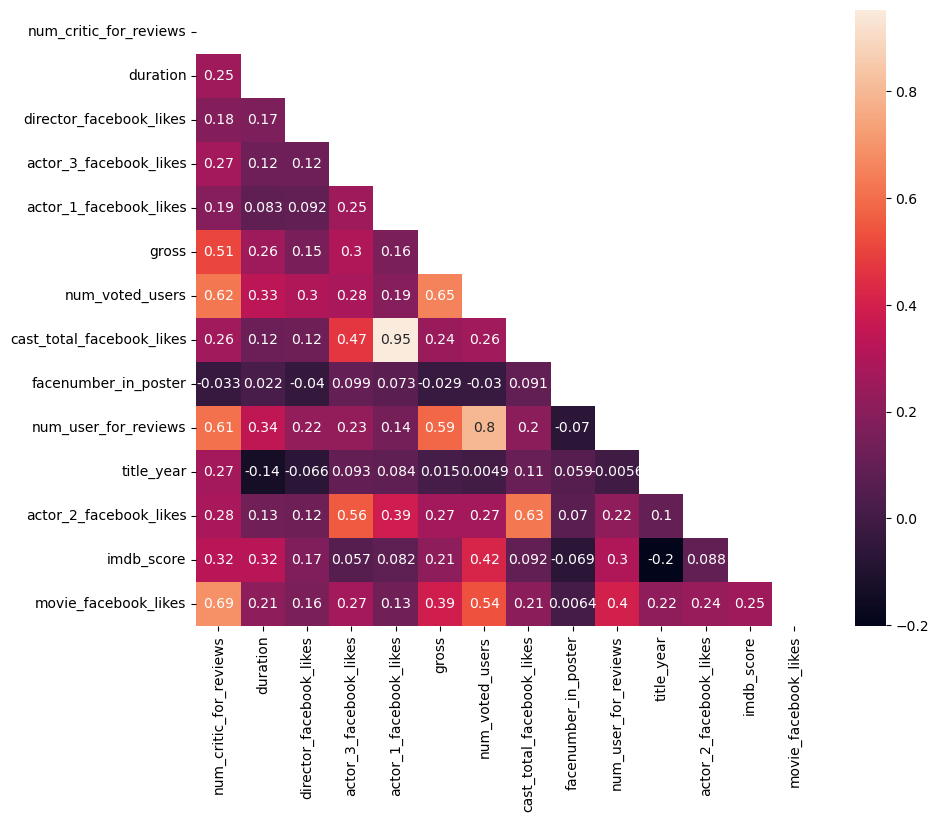

In [ ]:
# Calculate the correlation matrix
numeric = df.iloc[:,:14].corr()

# Create a mask to cover the upper triangle
mask = np.triu(np.ones_like(numeric, dtype=bool))

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap with the masked upper triangle
sns.heatmap(numeric, annot=True, mask=mask)

plt.show()

All the highly correlated features
- **log1p(cast_total_facebook_likes)** and **log1p(actor_1_facebook_likes)** has correlation of **0.95**
- **log1p(cast_total_facebook_likes)** and **log1p(actor_2_facebook_likes)** has correlation of **0.80**
- **movie_facebook_likes** and **num_critic_for_review** has correlation of **0.69**
- **num_user_for_review** and **num_voted_user** has correlation of **0.78**

In [ ]:
'''arr = ['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']
for i in arr:
    df.drop([i],axis=1,inplace=True)'''

"arr = ['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']\nfor i in arr:\n    df.drop([i],axis=1,inplace=True)"

#### Information gain

In [ ]:
numerical_df = df.iloc[:,:14]

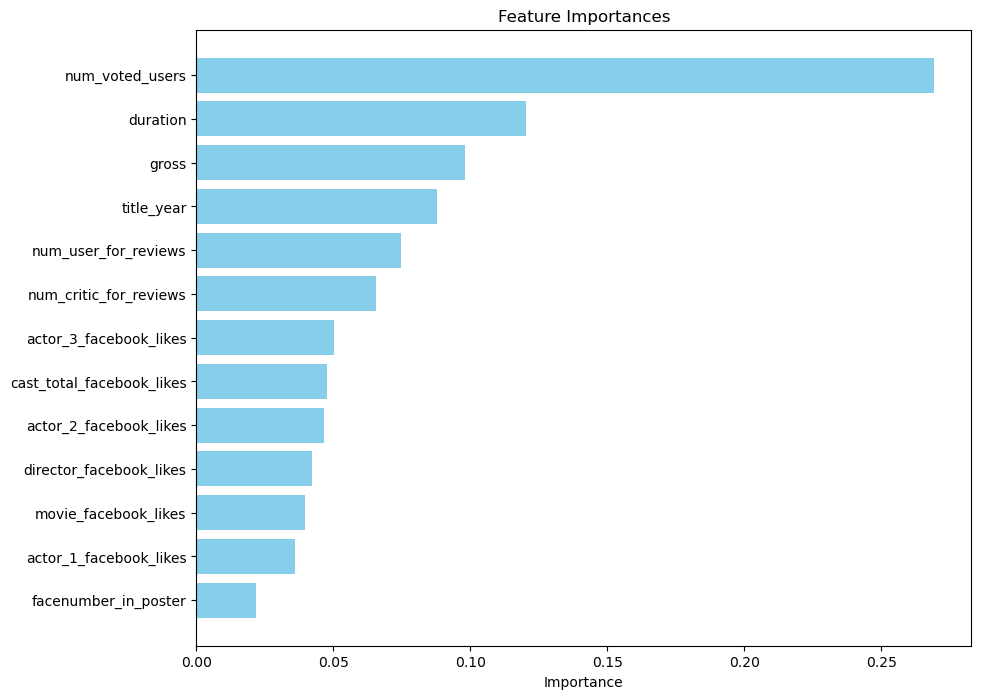

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# Assuming 'X' is your feature matrix and 'y' is the target variable
X = numerical_df.drop(['imdb_score'],axis=1)
y = df['imdb_score']

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=200, random_state=1)
rf_regressor.fit(X, y)  # X is your feature matrix, y is the continuous IMDb scores

# Extract feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to show feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

from the correlation heatmap and information gain, we can see that correlation between facenumber_in_poster and imdb_score is > 0.1 and the information gain is the lowest with 0.13. It is reasonable ot remove the column

In [ ]:
df.drop(['facenumber_in_poster'],axis=1,inplace=True)
df.drop(['cast_total_facebook_likes'],axis=1,inplace=True)

In [ ]:
df['imdb_score'] = df['imdb_score'].apply(encode_imdb_scores)

### Model Selection

since this is a supervised classification question, there are a few model to consider

- Random Forest
- GradientBoost
- XGBoost

Random Forest:
Ensemble Technique: Utilizes the ensemble method by constructing multiple decision trees during training and averaging the predictions.
Robust to Overfitting: Less prone to overfitting due to randomness in feature selection and bootstrapping of samples.
Handles Large Datasets: Efficiently handles large datasets with high dimensionality.
Feature Importance: Provides a ranking of feature importance, aiding in feature selection.
Implicit Handling of Missing Data: Can handle missing values in the dataset without requiring imputation.

Gradient Boosting:
Sequential Learning: Builds trees sequentially, with each tree correcting errors made by the previous one, improving overall accuracy.
High Predictive Accuracy: Often produces better predictive accuracy compared to Random Forests.
Handles Different Loss Functions: Adaptable to various loss functions, making it versatile for different types of problems.
Feature Importance: Provides insights into feature importance and can handle mixed data types.
Robustness to Overfitting: Employs techniques like shrinkage and tree constraints to prevent overfitting.

XGBoost (Extreme Gradient Boosting):
High Efficiency: Utilizes a more regularized model formalization to control overfitting and computational speed, making it faster than traditional Gradient Boosting.
Parallel Processing: Can handle parallel computation on a single machine, resulting in faster execution.
Regularization: Provides built-in regularization techniques to prevent overfitting.
Customization: Allows users to define custom optimization objectives and evaluation criteria.
Handles Missing Values: Automatically handles missing values in the dataset.

Comparison and Usage:
Random Forest: Great for handling high-dimensional data and when computational resources are limited. It's robust and generally provides good results without extensive hyperparameter tuning.

Gradient Boosting: Ideal for predictive accuracy and often performs better than Random Forest but might require more computational resources and careful tuning to prevent overfitting.

XGBoost: Offers a balance between computational speed and model performance. It's often the preferred choice for large datasets and competitions due to its efficiency and excellent predictive power.

### Spliting data

In [ ]:
X = df.drop(['imdb_score'],axis=1)
y = df['imdb_score']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

- stratify=y preserve class distribution in both testing and training set.
- test_size of 0.3 is used because of the imbalance target, a larger testing set might be beneficial for evaluating the model's performance, especially in the minority class.
- 0.7 training set is also a reasonable amount of training sample.
- With a larger test set, metrics such as f1-score and recall are likely to have lower variance due to more reliable estimate of the model's performance on unseen data.

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

Maintaining Sufficient Samples per Fold: With a very small number of instances in the least populated class (7 members), using a higher number of splits might lead to some folds lacking representation from this class. Having a smaller number of folds (e.g., 5) increases the chances of including instances from all classes in each fold.

Balancing Class Representation: The goal of stratified cross-validation is to maintain class balance in each fold. When the number of instances in the least populated class is low, using fewer splits (5 in this case) helps ensure a more balanced representation of classes across the folds.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier

### Choosing evaluation metrics

Because of the class imbalance in target feature, accuracy is not the best at evaluating the performance of the model since accuracy is highly bias towards the majority class. Because whan calculating accuracy, (TP + TN) / (TP + TN + FP + FN), It calculates the overall raio of the correctly predicted instances, which is largely dominated by major class.

Metrics such as f1-score, recall and precision are more suitable when there is  class imbalance in target feature.


- Recall - It measures the ratio of actual positive cases that were correctly identified. In imbalanced scenarios, where the focus is on capturing all instances of the minority class.
- Precision - It represents the ratio of true positive predictions out of all positive predictions. When false positives need to be minimized, especially in scenarios where misclassifying the minority class is costly, precision becomes important.
- F1-score - combination of Recall and Precision

Weighted F1-score will be used because it considers the average weighted by the number of true instances for each class.In the case of develop a predictive model capable of categorising movies into five categories using the properties of the provided information, we need to have a balance between precision and recall.The model needs to correctly identify movies belonging to each category while minimizing misclassifications so that the prediction is accurate.

### XGBoost

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
%%time

xgb = XGBClassifier(device = "cuda", n_estimators=200, learning_rate=0.01, objective='multi:softmax', num_class=5)

xgb.fit(X_train, y_train)

# Define the scoring metrics as a list
scoring = ['f1_weighted', 'recall_weighted', 'precision_weighted']

# Perform cross-validation and compute multiple metrics simultaneously
scores = cross_validate(xgb, X_train, y_train, cv=skf, scoring=scoring)

# Print the mean scores
print("Mean F1:", scores['test_f1_weighted'].mean())
print("Mean Recall:", scores['test_recall_weighted'].mean())
print("Mean Precision:", scores['test_precision_weighted'].mean())

C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [20:56:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(

Mean F1: 0.7152516213665987
Mean Recall: 0.7356366084011695
Mean Precision: 0.7103584711742381
CPU times: total: 24.3 s
Wall time: 13.3 s


C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


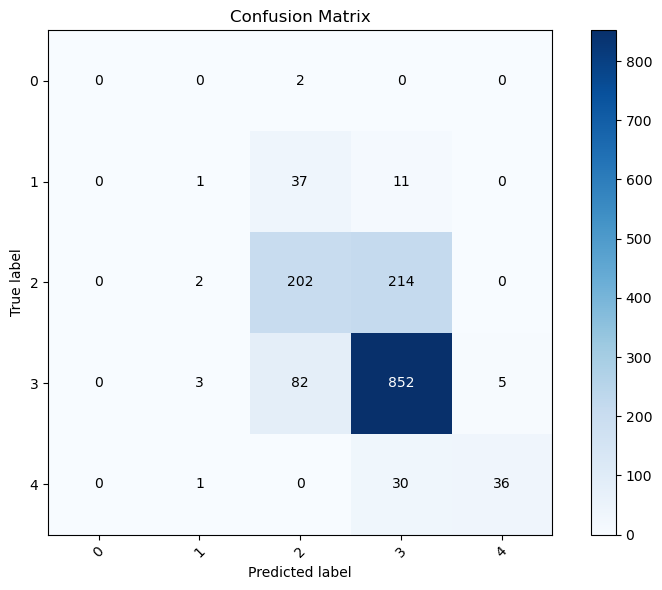

In [ ]:
y_pred = xgb.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
classes = ['0', '1', '2','3','4']  # Replace with your class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Display the values inside the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

### Random Forest

In [ ]:
%%time
rfc = RandomForestClassifier(random_state=1,n_jobs=-1,class_weight = 'balanced')

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Perform cross-validation and compute multiple metrics simultaneously
scores = cross_validate(rfc, X_train, y_train, cv=skf, scoring=scoring)

# Print the mean scores
print("Mean F1:", scores['test_f1_weighted'].mean())
print("Mean Recall:", scores['test_recall_weighted'].mean())
print("Mean Precision:", scores['test_precision_weighted'].mean())

C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Raven SE\AppData\Ro

Mean F1: 0.7174786382684398
Mean Recall: 0.7463755495256728
Mean Precision: 0.7215636652947718
CPU times: total: 2.84 s
Wall time: 3.52 s


C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


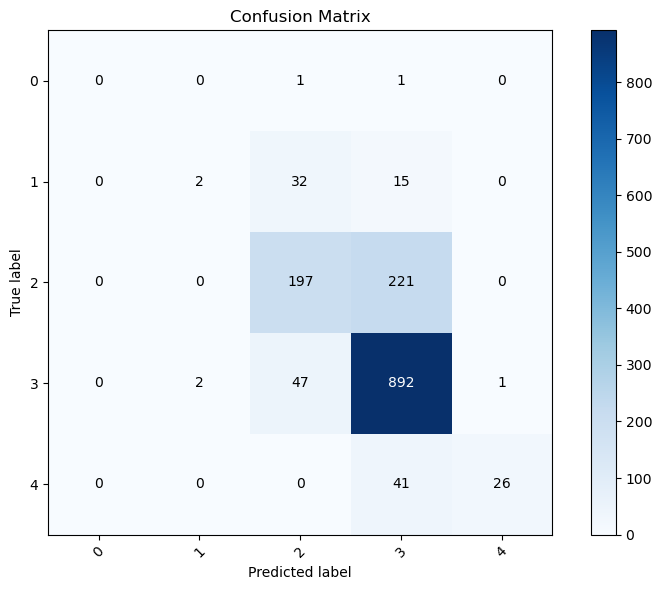

In [ ]:
y_pred = rfc.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
classes = ['0', '1', '2','3','4']  # Replace with your class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Display the values inside the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
%%time
dtc = DecisionTreeClassifier(random_state=1,class_weight = 'balanced' )
dtc.fit(X_train, y_train)

# Perform cross-validation and compute multiple metrics simultaneously
scores = cross_validate(dtc, X_train, y_train, cv=skf, scoring=scoring)

# Print the mean scores
print("Mean F1:", scores['test_f1_weighted'].mean())
print("Mean Recall:", scores['test_recall_weighted'].mean())
print("Mean Precision:", scores['test_precision_weighted'].mean())

Mean F1: 0.6551087509832544
Mean Recall: 0.6540960434151575
Mean Precision: 0.6568569730558043
CPU times: total: 531 ms
Wall time: 524 ms


C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


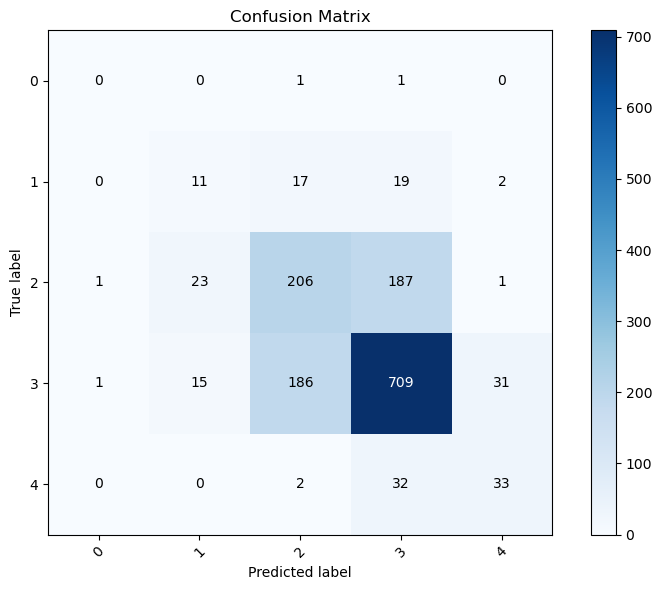

In [ ]:
y_pred = dtc.predict(X_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
classes = ['0', '1', '2','3','4']  # Replace with your class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Display the values inside the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

### Model Comparison

- None of the model can predict class 0 which only have 2 instances.
- Classes 2 and 3 seem to have higher numbers along the diagonal, indicating relatively accurate predictions for these classes.
- Class 1 have significant misclassifications into classes 2 and 3, as indicated by the higher values outside the diagonal in its row. Random Forest has the worst miss classification of class 1 with only 4 out of 49 is correct, xgboost and gradient boost both have 12 correct classification of class 1.

XGBoost is the better algorithm among 3 of them with a few advantages over random forest and gradient boosting

1. When comparing XGBoost with Random Forest, XGBoost is better at predicting the minor class as shown in the confusion matrix
2. XGBoost takes a lot less time compare to Gradient Boosting since it can support GPU.
3. Both XGBoost and Gradient boost implements tree pruning that helps reduce overfitting by preventing excessively deep trees.


### Hyperparameter Tuning

### Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [ ]:
model = rfc
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 400],
    # Number of trees in the forest. More trees can increase model performance,
    # but too many trees might lead to overfitting or increased computation time.

    'max_depth': [None, 5, 10, 20],
    # Maximum depth of each tree. Higher depths allow the model to capture more complex
    # relationships in the data but might lead to overfitting if too high.

    'min_samples_split': [1, 2, 5],
    # Minimum number of samples required to split an internal node.
    # Higher values might prevent overfitting by requiring more samples for a split.

    'min_samples_leaf': [1, 5, 10],
    # Minimum number of samples required to be at a leaf node.
    # Similar to min_samples_split, higher values can prevent overfitting.

    'max_features': ['auto', 'sqrt'],
    # The number of features to consider when looking for the best split.
    # 'auto' uses all features, 'sqrt' uses the square root of the total features.

    'bootstrap': [True, False],
    # Whether bootstrap samples are used when building trees.
    # False might lead to slightly more random trees but might reduce overfitting.
    'class_weight' : ['balanced']
}

In [ ]:
rf_grid = GridSearchCV(estimator = model,
                       param_grid = param_grid,
                       cv = 5,
                       verbose=2,
                       n_jobs = -1)

In [ ]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
539 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 638, in _validate_p

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=1),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 400]},
             verbose=2)

In [ ]:
rf_grid.best_params_

{'bootstrap': False,
 'class_weight': 'balanced',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [ ]:
rf_grid.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=20,
                       min_samples_split=5, n_estimators=400, n_jobs=-1,
                       random_state=1)

In [ ]:
best_model = rf_grid.best_estimator_
cross_val_f1 = np.mean(cross_val_score(best_model, X_test, y_test, cv=skf, scoring='f1_weighted'))

C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
cross_val_f1

0.7105308015591655

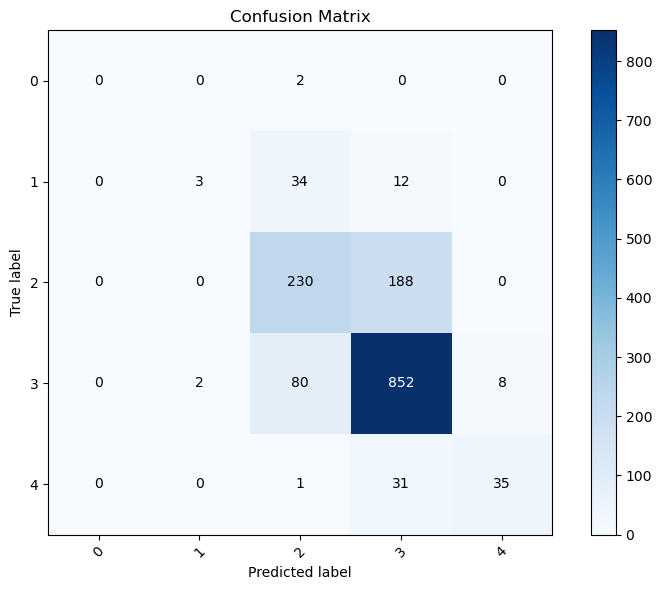

In [ ]:
best_model = rf_grid.best_estimator_
y_pred = best_model.predict(X_test)
y_true = y_test

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
classes = ['0', '1', '2', '3', '4']  # Replace with your class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Display the values inside the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

## XGBoost

In [ ]:
xgb.get_params()

{'objective': 'multi:softmax',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': 'cuda',
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.01,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': 200,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'num_class': 5}

In [ ]:
xgb_param_grid = {
    # How much the step size shrink in each iteration,smaller learning rate cost more computational power,but more robust
    'learning_rate' : [0.01,0.1],

    # The maximum depth that is too high can cause overfitting while too low cause underfitting
    'max_depth': [6,10,20],

    # L2 regularization term on weights. Increasing this value will make model more conservative.
    'reg_lambda': [0,100],

    # L1 regularization term on weights. Increasing this value will make model more conservative.
    'reg_alpha': [0,100],

    # Control the balance of positive and negative weights, useful for unbalanced classes.
    'scale_pos_weight': [1,3,5],

    #  is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
    'colsample_bytree': [0.5,0.75],

    # Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the
    # training data prior to growing trees. and this will prevent overfitting.
    # Subsampling will occur once in every boosting iteration.
    'subsample':[0.5,0.75]
}

xgb_grid = GridSearchCV(estimator = xgb,
                       param_grid = xgb_param_grid,
                       cv=5,
                       verbose=2,
                       n_jobs = -1)


In [ ]:
%%time
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [23:40:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


CPU times: total: 5min 24s
Wall time: 2h 34min 17s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device='cuda',
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.0...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_class=5,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.75, 1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 6, 10],
                         'reg_alpha': [0, 100], 'reg_lambda': [0, 100],
                         'scale_pos_weight': [1, 3, 5],
                         'subsample': [0.5, 0.75, 1]},
             verbose=2)

In [ ]:
best_model = xgb_grid.best_estimator_
cross_val_f1 = np.mean(cross_val_score(best_model, X_test, y_test, cv=skf, scoring='f1_weighted'))

C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [02:19:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [02:19:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:160: UserWarning: [02:1

In [ ]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.75, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [ ]:
xgb_grid.best_params_

{'colsample_bytree': 0.75,
 'learning_rate': 0.1,
 'max_depth': 10,
 'reg_alpha': 0,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.5}

In [ ]:
cross_val_f1

0.7229407616619875

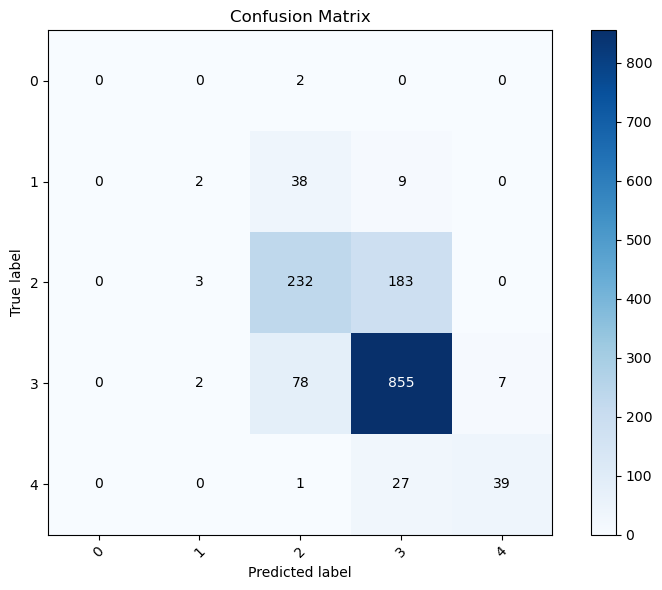

In [ ]:
best_model = xgb_grid.best_estimator_
y_pred = best_model.predict(X_test)
y_true = y_test

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
classes = ['0', '1', '2', '3', '4']  # Replace with your class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Display the values inside the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

### Decision Tree

In [ ]:
dtc_params_grid = {
    # Max depth, higher will cause overfitting
     'max_depth': [10, 20, 30, None],

    # The number of features to consider when looking for the best split:
     'max_features': [None,'log2', 'sqrt'],

    # The minimum number of samples required to be at a leaf node.
     'min_samples_leaf': [1, 2, 4],

    # The minimum number of samples required to split an internal node
     'min_samples_split': [2, 5, 10],

    # balance the weight by automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
     'class_weight' : ['balanced',None],

    # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
    'min_weight_fraction_leaf':[0.0,0.5]

}

dtc_grid = GridSearchCV(estimator = dtc,
                       param_grid = dtc_params_grid,
                       cv=5,
                       verbose=2,
                       n_jobs = -1)

In [ ]:
%%time
dtc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
CPU times: total: 8.75 s
Wall time: 15.4 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [10, 20, 30, None],
                         'max_features': [None, 'log2', 'sqrt'],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'min_weight_fraction_leaf': [0.0, 0.5]},
             verbose=2)

In [ ]:
dtc_grid.best_params_

{'class_weight': None,
 'max_depth': 10,
 'max_features': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0}

In [ ]:
best_model = dtc_grid.best_estimator_
cross_val_f1 = np.mean(cross_val_score(best_model, X_test, y_test, cv=skf, scoring='f1_weighted'))

C:\Users\Raven SE\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
cross_val_f1

0.642406756844794

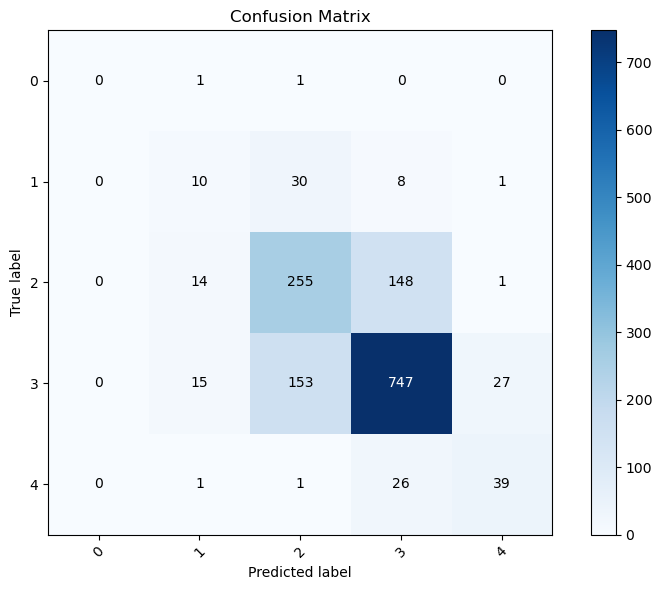

In [ ]:
best_model = dtc_grid.best_estimator_
y_pred = best_model.predict(X_test)
y_true = y_test

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to the plot
classes = ['0', '1', '2', '3', '4']  # Replace with your class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Display the values inside the heatmap
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

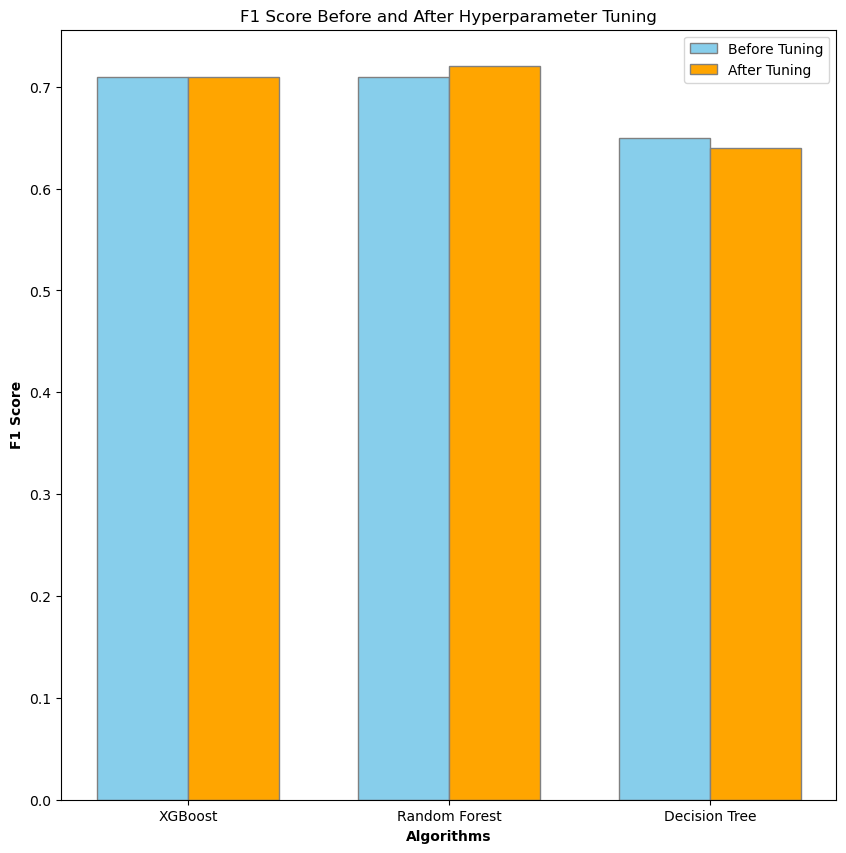

In [ ]:
# F1 scores before hyperparameter tuning
f1_scores_before = [0.71, 0.71, 0.65]
# F1 scores after hyperparameter tuning
f1_scores_after = [0.71, 0.72, 0.64]

import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
algorithms = ['XGBoost','Random Forest','Decision Tree' ]

# Width of the bars
bar_width = 0.35

# Positions of bars on x-axis
r1 = range(len(algorithms))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10,10))

# Plotting the bars
plt.bar(r1, f1_scores_before, color='skyblue', width=bar_width, edgecolor='grey', label='Before Tuning')
plt.bar(r2, f1_scores_after, color='orange', width=bar_width, edgecolor='grey', label='After Tuning')

# Adding labels, title, and ticks
plt.xlabel('Algorithms', fontweight='bold')
plt.ylabel('F1 Score', fontweight='bold')
plt.title('F1 Score Before and After Hyperparameter Tuning')
plt.xticks([r + bar_width / 2 for r in range(len(algorithms))], algorithms)

# Adding legend
plt.legend()

# Show plot
plt.show()